# Credit EDA Assignment

## Introduction

#### This assignment aims to give you an idea of applying EDA in a real business scenario. In this assignment, apart from applying the techniques that you have learnt in the EDA module, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

## Business Understanding 

#### The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it to their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

#### When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

#### If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

#### If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

#### The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

#### The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

#### All other cases: All other cases when the payment is paid on time.

# Business Objectives
#### This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

#### In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

#### To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough.

## Results Expected by Learners
#### Present the overall approach of the analysis in a presentation. Mention the problem statement and the analysis approach briefly.

#### Identify the missing data and use appropriate method to deal with it. (Remove columns/or replace it with an appropriate value)

#### Identify if there are outliers in the dataset. Also, mention why do you think it is an outlier. Again, remember that for this exercise, it is not necessary to remove any data points.

#### Identify if there is data imbalance in the data. Find the ratio of data imbalance.

#### Explain the results of univariate, segmented univariate, bivariate analysis, etc. in business terms.

#### Find the top 10 correlation for the Client with payment difficulties and all other cases (Target variable). Note that you have to find the top correlation by segmenting the data frame w.r.t to the target variable and then find the top correlation for each of the segmented data and find if any insight is there.  Say, there are 5+1(target) variables in a dataset: Var1, Var2, Var3, Var4, Var5, Target. And if you have to find top 3 correlation, it can be: Var1 & Var2, Var2 & Var3, Var1 & Var3. Target variable will not feature in this correlation as it is a categorical variable and not a continuous variable which is increasing or decreasing.  

#### Include visualisations and summarise the most important results in the presentation. You are free to choose the graphs which explain the numerical/categorical variables. Insights should explain why the variable is important for differentiating the clients with payment difficulties with all other cases. 

## Data Cleaning

### Data Types

#### There are multiple types of data types available in the data set. some of them are numerical type and some of categorical type. You are required to get the idea about the data types after reading the data frame.

#### Following are the some of the types of variables:

#### Numeric data type: banking dataset: salary, balance, duration and age.
#### Categorical data type: banking dataset: education, job, marital, poutcome and month etc.
#### Ordinal data type: banking dataset: Age group.
#### Time and date type
##### Coordinates type of data: latitude and longitude type.

# Table of Contents

## 1  Getting Jupyter Ready:

## 2  Reading & Understanding the data

## 3  Deleting Columns with null percentage >= 40%

## 4 Data Imputation for Application File

## 5 Standardize Values

## 6  Identifying the outliers

## 7  Data Analysis

## 8  Categorical Variables Analysis

## 9  Numerical Univariate Analysis

## 10  Numerical Bivariate Analysis

## 11  Merged Dataframes Analysis

## 12  Conclusions

## 13  Decisive Factors for an applicant to be Re-payer, hence applications can be approved

## 14  Decisive Factors for an applicant to be a potential Defaulter, hence application can be rejected :

## 15  Decisive attributes for an potential defaulters who can be considered for loan with higher interest to mitigate any default risk to prevent business loss:

## 16  More suggestions:







### Importing the libraries.

In [19]:
# Importing the warnings
import warnings
warnings.filterwarnings("ignore")

In [20]:
# Importing the useful libraries.

import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
import matplotlib.style as style
%matplotlib inline

## Adjust Jupiter Views:- 

In [21]:
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)

## 1:-  Read in the Data set. 

#### Importing the Input files

In [22]:
app_data = pd.read_csv("application_data.csv")
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [23]:
pre_data = pd.read_csv("previous_application.csv")
pre_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


## 2:- Inspect Data Frames

In [24]:
# Shapes of data frames
app_data.shape

(307511, 122)

In [25]:
pre_data.shape

(1670214, 37)

In [26]:
# application_data column details:-
app_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [27]:
# previous_data column details:-
pre_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [28]:
# Checking the numeric variables of the dataframes
app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [29]:
pre_data.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


## 3:- Data Cleaining & Manipulation

### Finding the Null Values

#### Application_data Missing values


In [30]:
app_data.isnull().sum()


SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [31]:
app_data.isnull().mean()*100


SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [32]:
# % null value in each column
app_data_null = round(100*(app_data.isnull().sum()/app_data.shape[0]),2).sort_values(ascending=True)

app_data_null

SK_ID_CURR                       0.00
HOUR_APPR_PROCESS_START          0.00
REG_REGION_NOT_WORK_REGION       0.00
LIVE_REGION_NOT_WORK_REGION      0.00
REG_CITY_NOT_LIVE_CITY           0.00
REG_CITY_NOT_WORK_CITY           0.00
LIVE_CITY_NOT_WORK_CITY          0.00
ORGANIZATION_TYPE                0.00
FLAG_DOCUMENT_21                 0.00
FLAG_DOCUMENT_20                 0.00
FLAG_DOCUMENT_19                 0.00
FLAG_DOCUMENT_18                 0.00
FLAG_DOCUMENT_17                 0.00
FLAG_DOCUMENT_16                 0.00
WEEKDAY_APPR_PROCESS_START       0.00
FLAG_DOCUMENT_15                 0.00
FLAG_DOCUMENT_13                 0.00
FLAG_DOCUMENT_12                 0.00
FLAG_DOCUMENT_11                 0.00
FLAG_DOCUMENT_10                 0.00
FLAG_DOCUMENT_9                  0.00
FLAG_DOCUMENT_8                  0.00
FLAG_DOCUMENT_7                  0.00
FLAG_DOCUMENT_6                  0.00
FLAG_DOCUMENT_5                  0.00
FLAG_DOCUMENT_4                  0.00
FLAG_DOCUMEN

In [33]:
# How many columns have more than or equal to 40% null values ?
len(app_data_null[app_data_null >= 40])

49

In [34]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## From the observation it seems that there are 49 columns with more then 40% Null values, hence we need to drop them.

### Dropping columns from application_data which has Null Values with more than 40%

In [35]:
app_data.drop(labels=["COMMONAREA_MEDI", "COMMONAREA_AVG", "COMMONAREA_MODE", "NONLIVINGAPARTMENTS_MODE",
                     "NONLIVINGAPARTMENTS_MEDI", "NONLIVINGAPARTMENTS_AVG", "FONDKAPREMONT_MODE", "LIVINGAPARTMENTS_MEDI", 
                     "LIVINGAPARTMENTS_MODE", "LIVINGAPARTMENTS_AVG", "FLOORSMIN_MEDI", "FLOORSMIN_MODE", "FLOORSMIN_AVG", 
                     "YEARS_BUILD_MEDI", "YEARS_BUILD_MODE", "YEARS_BUILD_AVG", "OWN_CAR_AGE", 
                     "LANDAREA_MODE", "LANDAREA_MEDI", "LANDAREA_AVG", "BASEMENTAREA_MEDI", "BASEMENTAREA_MODE", "BASEMENTAREA_AVG", 
                     "EXT_SOURCE_1", "NONLIVINGAREA_MEDI", "NONLIVINGAREA_MODE", "NONLIVINGAREA_AVG", "ELEVATORS_MODE", 
                     "ELEVATORS_MEDI", "ELEVATORS_AVG", "WALLSMATERIAL_MODE", "APARTMENTS_MODE", "APARTMENTS_MEDI", "APARTMENTS_AVG", 
                     "ENTRANCES_MEDI", "ENTRANCES_MODE", "ENTRANCES_AVG", "LIVINGAREA_MEDI", "LIVINGAREA_MODE", "LIVINGAREA_AVG", 
                     "HOUSETYPE_MODE", "FLOORSMAX_MODE", "FLOORSMAX_MEDI", "FLOORSMAX_AVG", "YEARS_BEGINEXPLUATATION_MEDI", "YEARS_BEGINEXPLUATATION_MODE", 
                     "YEARS_BEGINEXPLUATATION_AVG", "TOTALAREA_MODE", "EMERGENCYSTATE_MODE"], axis=1, inplace=True)

In [36]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
# % null value in each column
app_data_null = round(100*(app_data.isnull().sum()/app_data.shape[0]),2).sort_values(ascending=True)

app_data_null

SK_ID_CURR                      0.00
REG_REGION_NOT_LIVE_REGION      0.00
REG_REGION_NOT_WORK_REGION      0.00
LIVE_REGION_NOT_WORK_REGION     0.00
REG_CITY_NOT_WORK_CITY          0.00
LIVE_CITY_NOT_WORK_CITY         0.00
ORGANIZATION_TYPE               0.00
DAYS_LAST_PHONE_CHANGE          0.00
FLAG_DOCUMENT_2                 0.00
FLAG_DOCUMENT_3                 0.00
FLAG_DOCUMENT_4                 0.00
FLAG_DOCUMENT_5                 0.00
FLAG_DOCUMENT_6                 0.00
FLAG_DOCUMENT_7                 0.00
FLAG_DOCUMENT_8                 0.00
FLAG_DOCUMENT_9                 0.00
FLAG_DOCUMENT_10                0.00
FLAG_DOCUMENT_11                0.00
FLAG_DOCUMENT_12                0.00
FLAG_DOCUMENT_13                0.00
FLAG_DOCUMENT_14                0.00
FLAG_DOCUMENT_15                0.00
FLAG_DOCUMENT_16                0.00
FLAG_DOCUMENT_17                0.00
FLAG_DOCUMENT_18                0.00
FLAG_DOCUMENT_19                0.00
FLAG_DOCUMENT_20                0.00
F

In [38]:
# How many columns have more than or equal to 40% null values ?
len(app_data_null[app_data_null >= 40])

0

### Previous_application Missing values


In [39]:
pre_data.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [40]:
pre_data.isnull().mean()*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [41]:
# % null value in each column
previous_data_null = round(100*(pre_data.isnull().sum()/pre_data.shape[0]),2).sort_values(ascending=True)

previous_data_null

SK_ID_PREV                      0.00
NAME_YIELD_GROUP                0.00
NAME_SELLER_INDUSTRY            0.00
SELLERPLACE_AREA                0.00
CHANNEL_TYPE                    0.00
NAME_PRODUCT_TYPE               0.00
NAME_PORTFOLIO                  0.00
NAME_GOODS_CATEGORY             0.00
NAME_CLIENT_TYPE                0.00
CODE_REJECT_REASON              0.00
DAYS_DECISION                   0.00
NAME_CONTRACT_STATUS            0.00
NAME_CASH_LOAN_PURPOSE          0.00
NAME_PAYMENT_TYPE               0.00
AMT_APPLICATION                 0.00
NFLAG_LAST_APPL_IN_DAY          0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
HOUR_APPR_PROCESS_START         0.00
WEEKDAY_APPR_PROCESS_START      0.00
AMT_CREDIT                      0.00
NAME_CONTRACT_TYPE              0.00
SK_ID_CURR                      0.00
PRODUCT_COMBINATION             0.02
AMT_ANNUITY                    22.29
CNT_PAYMENT                    22.29
AMT_GOODS_PRICE                23.08
DAYS_LAST_DUE                  40.30
D

In [42]:
# How many columns have more than or equal to 40% null values ?
len(previous_data_null[previous_data_null >= 40])

11

## From the observation it seems that there are 11 columns with more then 40% Null values, hence we need to drop them.¶

#### Dropping columns from previous_application which has Null Values with more than 40%

In [43]:
pre_data.drop(labels=["RATE_INTEREST_PRIVILEGED", "RATE_INTEREST_PRIMARY", "RATE_DOWN_PAYMENT", 
                     "AMT_DOWN_PAYMENT", "NAME_TYPE_SUITE", "DAYS_TERMINATION", "NFLAG_INSURED_ON_APPROVAL", 
                     "DAYS_FIRST_DRAWING", "DAYS_FIRST_DUE", "DAYS_LAST_DUE_1ST_VERSION", "DAYS_LAST_DUE"], axis=1, inplace=True)

In [44]:
pre_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [45]:
previous_data_null = round(100*(pre_data.isnull().sum()/pre_data.shape[0]),2).sort_values(ascending=True)

previous_data_null

SK_ID_PREV                      0.00
NAME_SELLER_INDUSTRY            0.00
SELLERPLACE_AREA                0.00
CHANNEL_TYPE                    0.00
NAME_PRODUCT_TYPE               0.00
NAME_PORTFOLIO                  0.00
NAME_GOODS_CATEGORY             0.00
NAME_CLIENT_TYPE                0.00
CODE_REJECT_REASON              0.00
NAME_PAYMENT_TYPE               0.00
DAYS_DECISION                   0.00
NAME_YIELD_GROUP                0.00
NAME_CONTRACT_STATUS            0.00
NFLAG_LAST_APPL_IN_DAY          0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
HOUR_APPR_PROCESS_START         0.00
WEEKDAY_APPR_PROCESS_START      0.00
AMT_CREDIT                      0.00
AMT_APPLICATION                 0.00
NAME_CONTRACT_TYPE              0.00
SK_ID_CURR                      0.00
NAME_CASH_LOAN_PURPOSE          0.00
PRODUCT_COMBINATION             0.02
AMT_ANNUITY                    22.29
CNT_PAYMENT                    22.29
AMT_GOODS_PRICE                23.08
dtype: float64

In [46]:
len(previous_data_null[previous_data_null >= 40])

0

In [47]:
app_data.shape

(307511, 73)

In [48]:
pre_data.shape

(1670214, 26)

### Imputing missing values


In [49]:
# Checking the columns after removing high missing values(>=40%)
# Before Imputing

(app_data.isnull().sum()/ len(app_data)*100).sort_values(ascending=False)

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
NAME_TYPE_SUITE                 0.420148
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
FLAG_DOCUMENT_17                0.000000
FLAG_DOCUMENT_18                0.000000
FLAG_DOCUMENT_21                0.000000
FLAG_DOCUMENT_20                0.000000
FLAG_DOCUMENT_19                0.000000
FLAG_DOCUMENT_2                 0.000000
FLAG_DOCUMENT_3 

In [50]:
app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.068510e+05,246546.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,5.143927e-01,0.510853,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,1.910602e-01,0.194844,2.400989,0.446698,2.379803,0.362291,826.808487,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000

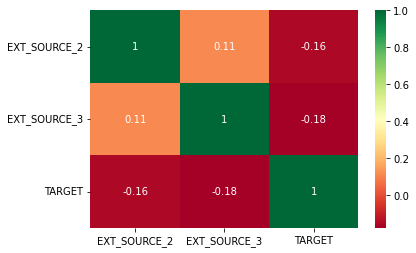

In [51]:
# Checking correlation of EXT_SOURCE_X columns vs TARGET column
# There is Low coorelation between EXT_SOURCE_X columns vs TARGET column

sns.heatmap( app_data[["EXT_SOURCE_2","EXT_SOURCE_3","TARGET", ]].corr(), annot= True, cmap= "RdYlGn")
plt.show()

## Observation: Based on the above Heatmap There is almost no coorelation between EXT_SOURCE_X columns vs TARGET column.

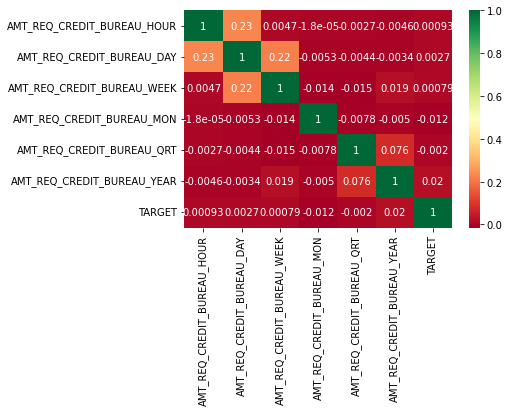

In [52]:
# Checking correlation of AMT_REQ_CREDIT_XXXXX columns vs TARGET column

sns.heatmap(app_data[["AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_YEAR","TARGET", ]].corr(), annot= True, cmap= "RdYlGn")
plt.show()

## Observation: Based on the above Heatmap There is almost no coorelation between AMT_REQ_CREDIT_XXXXX columns vs TARGET column

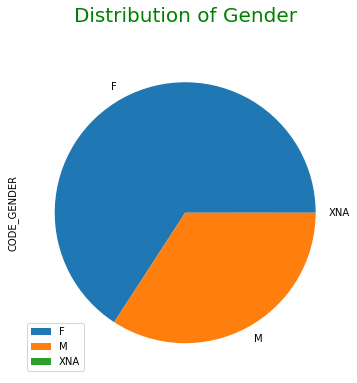

In [53]:
plt.figure(figsize = [6,6])
app_data.CODE_GENDER.value_counts(normalize= True).plot.pie()
plt.title("Distribution of Gender\n", fontdict={"fontsize":20, "fontweight":5, "color":"Green"})
plt.legend()
plt.show()

In [54]:
app_data["CODE_GENDER"].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [55]:
(app_data.isnull().sum()/ len(app_data)*100).sort_values(ascending=True)

SK_ID_CURR                      0.000000
HOUR_APPR_PROCESS_START         0.000000
REG_REGION_NOT_LIVE_REGION      0.000000
REG_REGION_NOT_WORK_REGION      0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
REG_CITY_NOT_WORK_CITY          0.000000
LIVE_CITY_NOT_WORK_CITY         0.000000
ORGANIZATION_TYPE               0.000000
FLAG_DOCUMENT_2                 0.000000
FLAG_DOCUMENT_3                 0.000000
FLAG_DOCUMENT_4                 0.000000
FLAG_DOCUMENT_5                 0.000000
FLAG_DOCUMENT_6                 0.000000
FLAG_DOCUMENT_7                 0.000000
FLAG_DOCUMENT_8                 0.000000
FLAG_DOCUMENT_9                 0.000000
FLAG_DOCUMENT_10                0.000000
FLAG_DOCUMENT_11                0.000000
FLAG_DOCUMENT_12                0.000000
FLAG_DOCUMENT_13                0.000000
FLAG_DOCUMENT_14                0.000000
FLAG_DOCUMENT_15                0.000000
FLAG_DOCUMENT_16                0.000000
FLAG_DOCUMENT_17                0.000000
FLAG_DOCUMENT_18

### Observation: Based on the above analysis there are 4 'XNA' values in Gender_Code Column, which can be imputed by Female i.e. mode of the Gender_Code because its value is around 65% of the total records adding 4 more records wont impact our analysis.

## Data Imputation for Application File


In [56]:
#'OCCUPATION_TYPE' has higher null percentage(31.35%) hence We will impute it with a new category as assigning 
# to any existing category might influence the analysis. Also this column seems to be an important come for our analysis,
app_data['OCCUPATION_TYPE'].fillna(value="Missing", inplace=True)

# there are 4 'XNA' values in Gender_Code Column, which can be imputed by Female i.e. mode of the Gender_Code 
# because its value is around 65% of the total records adding 4 more records wont impact our analysis
app_data.loc[app_data.CODE_GENDER == 'XNA','CODE_GENDER'] = 'F'

# There is almost no correlation between Ext_Source3 and Target, it has 19.8% nulls. 
# Hence imputing with median wont cause any issue with our analysis
app_data['EXT_SOURCE_3'].fillna(app_data['EXT_SOURCE_3'].median(), inplace=True)

# Imputing columns with 13% missing values with Mode Since they all are number of credit inquiries,
# replacing missing values with the most frequent value would make more sense.

app_data["AMT_REQ_CREDIT_BUREAU_YEAR"].fillna(value=app_data["AMT_REQ_CREDIT_BUREAU_YEAR"].mode()[0], inplace=True)
app_data["AMT_REQ_CREDIT_BUREAU_MON"].fillna(value=app_data["AMT_REQ_CREDIT_BUREAU_MON"].mode()[0], inplace=True)
app_data["AMT_REQ_CREDIT_BUREAU_WEEK"].fillna(value=app_data["AMT_REQ_CREDIT_BUREAU_WEEK"].mode()[0], inplace=True)
app_data["AMT_REQ_CREDIT_BUREAU_DAY"].fillna(value=app_data["AMT_REQ_CREDIT_BUREAU_DAY"].mode()[0], inplace=True)
app_data["AMT_REQ_CREDIT_BUREAU_HOUR"].fillna(value=app_data["AMT_REQ_CREDIT_BUREAU_HOUR"].mode()[0], inplace=True)
app_data["AMT_REQ_CREDIT_BUREAU_QRT"].fillna(value=app_data["AMT_REQ_CREDIT_BUREAU_QRT"].mode()[0], inplace=True)

# This is an object category with 0.42% nulls.
# Hence,imputing with with the most frequent category using mode()[0] would make sense
app_data['NAME_TYPE_SUITE'].fillna(value=app_data['NAME_TYPE_SUITE'].mode()[0], inplace=True)

# imputing data for columns which has less than 1% of null values with median. These are also float columns
app_data['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(value=app_data['OBS_30_CNT_SOCIAL_CIRCLE'].median(), inplace=True)
app_data['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(value=app_data['DEF_30_CNT_SOCIAL_CIRCLE'].median(), inplace=True)
app_data['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(value=app_data['OBS_60_CNT_SOCIAL_CIRCLE'].median(), inplace=True)
app_data['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(value=app_data['DEF_60_CNT_SOCIAL_CIRCLE'].median(), inplace=True)
app_data['EXT_SOURCE_2'].fillna(value=app_data['EXT_SOURCE_2'].median(), inplace=True)
app_data['AMT_GOODS_PRICE'].fillna(value=app_data['AMT_GOODS_PRICE'].median(), inplace=True)
app_data['AMT_ANNUITY'].fillna(value=app_data['AMT_ANNUITY'].median(), inplace=True)
app_data['CNT_FAM_MEMBERS'].fillna(value=app_data['CNT_FAM_MEMBERS'].median(), inplace=True)
app_data['DAYS_LAST_PHONE_CHANGE'].fillna(value=app_data['DAYS_LAST_PHONE_CHANGE'].median(), inplace=True)




In [57]:
app_data.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RAT

## Imputing Null Values in previous_application File


In [58]:
pre_data.isnull().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                    372235
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_GOODS_PRICE                385515
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT                    372230
NAME_YIELD_GROUP                    0
PRODUCT_COMBINATION               346
dtype: int64

In [59]:
(pre_data.isnull().sum()/ len(pre_data)*100).sort_values(ascending=True)

SK_ID_PREV                      0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
NAME_PORTFOLIO                  0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE                0.000000
CODE_REJECT_REASON              0.000000
NAME_PAYMENT_TYPE               0.000000
DAYS_DECISION                   0.000000
NAME_YIELD_GROUP                0.000000
NAME_CONTRACT_STATUS            0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
HOUR_APPR_PROCESS_START         0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
AMT_APPLICATION                 0.000000
NAME_CONTRACT_TYPE              0.000000
SK_ID_CURR                      0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
AMT_CREDIT                      0.000060
PRODUCT_COMBINATION             0.020716
CNT_PAYMENT                    22.286366
AMT_ANNUITY     

### AMT_ANNUITY 

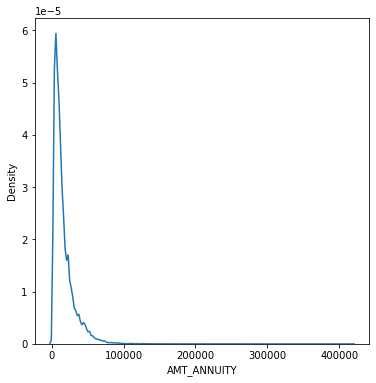

In [60]:
plt.figure(figsize=[6,6])
sns.kdeplot(pre_data["AMT_ANNUITY"])
plt.show()

## Observation: There is a single peak at the left side of the distribution and it indicates the presence of outliers and hence imputing with mean would not be the right approach and hence imputing with median. 

In [61]:
#### Impute AMT_ANNUITY with median as the distribution is greatly skewed
pre_data["AMT_ANNUITY"].fillna(pre_data["AMT_ANNUITY"].median(), inplace=True)

### AMT_GOODS

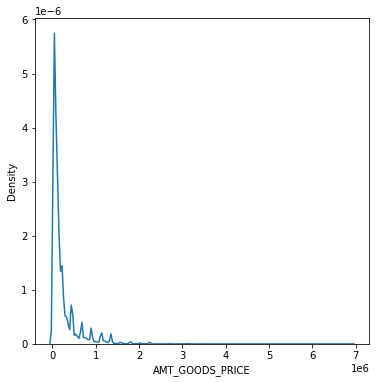

In [62]:
plt.figure(figsize=[6,6])
sns.kdeplot(pre_data["AMT_GOODS_PRICE"][pd.notnull(pre_data["AMT_GOODS_PRICE"])])
plt.show()

## Observation: There are several peaks along the distribution. Let's visualize graphs for mode, mean and median and see if the distribution is still about the same.

In [63]:
# Impute AMT_GOODS_PRICE with mode as the distribution is closely similar:
pre_data['AMT_GOODS_PRICE'].fillna(pre_data['AMT_GOODS_PRICE'].mode()[0], inplace=True)

## CNT_PAYMENT 

In [64]:
pre_data.CNT_PAYMENT.describe()

count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64

In [65]:
pre_data.CNT_PAYMENT.value_counts()

12.0    323049
6.0     190461
0.0     144985
10.0    141851
24.0    137764
18.0     77430
36.0     72583
60.0     53600
48.0     47316
8.0      30349
4.0      26924
30.0     16924
14.0      8253
42.0      7136
16.0      5710
5.0       3957
54.0      2104
20.0      1805
7.0       1434
9.0       1236
3.0       1100
15.0       904
11.0       669
72.0       139
13.0        51
17.0        48
84.0        45
22.0        37
23.0        27
26.0        13
35.0        11
66.0        10
28.0         8
29.0         8
32.0         6
19.0         6
34.0         4
59.0         4
41.0         3
47.0         3
45.0         3
21.0         3
44.0         2
39.0         2
46.0         2
38.0         2
33.0         1
40.0         1
53.0         1
Name: CNT_PAYMENT, dtype: int64

In [66]:
pre_data["CNT_PAYMENT"].fillna(pre_data["CNT_PAYMENT"].median(), inplace=True)

In [67]:
(pre_data.isnull().sum()/ len(pre_data)*100).sort_values(ascending=True)

SK_ID_PREV                     0.000000
CNT_PAYMENT                    0.000000
NAME_SELLER_INDUSTRY           0.000000
SELLERPLACE_AREA               0.000000
CHANNEL_TYPE                   0.000000
NAME_PRODUCT_TYPE              0.000000
NAME_PORTFOLIO                 0.000000
NAME_GOODS_CATEGORY            0.000000
NAME_CLIENT_TYPE               0.000000
CODE_REJECT_REASON             0.000000
NAME_PAYMENT_TYPE              0.000000
DAYS_DECISION                  0.000000
NAME_CONTRACT_STATUS           0.000000
NAME_CASH_LOAN_PURPOSE         0.000000
NFLAG_LAST_APPL_IN_DAY         0.000000
FLAG_LAST_APPL_PER_CONTRACT    0.000000
HOUR_APPR_PROCESS_START        0.000000
WEEKDAY_APPR_PROCESS_START     0.000000
AMT_GOODS_PRICE                0.000000
AMT_APPLICATION                0.000000
AMT_ANNUITY                    0.000000
NAME_CONTRACT_TYPE             0.000000
SK_ID_CURR                     0.000000
NAME_YIELD_GROUP               0.000000
AMT_CREDIT                     0.000060


## Observation:We still have few null values in the PRODUCT_COMBINATION column. We can ignore as this percentage is very less. 

### Standardize Values

#### Looking at all object type values


In [68]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [69]:
app_data.NAME_CONTRACT_TYPE.value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [70]:
app_data.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [71]:
app_data.FLAG_OWN_CAR.value_counts()

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

In [72]:
app_data.FLAG_OWN_REALTY.value_counts()

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

In [73]:
app_data.NAME_TYPE_SUITE.value_counts()

Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [74]:
app_data.NAME_INCOME_TYPE.value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [75]:
app_data.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

In [76]:
app_data.NAME_FAMILY_STATUS.value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [77]:
app_data.NAME_HOUSING_TYPE.value_counts()

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

In [78]:
app_data.OCCUPATION_TYPE.value_counts()

Missing                  96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [79]:
app_data.WEEKDAY_APPR_PROCESS_START.value_counts()

TUESDAY      53901
WEDNESDAY    51934
MONDAY       50714
THURSDAY     50591
FRIDAY       50338
SATURDAY     33852
SUNDAY       16181
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64

In [80]:
app_data.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

## Days columns

### Converting Negative days to positive days 

In [81]:
app_data.DAYS_BIRTH.describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [82]:
# Converting Negative days to positive days 

date_2_positive = [col for col in app_data if col.startswith('DAYS')]
for col in date_2_positive:
    app_data[col] = abs(app_data[col])

print(app_data['DAYS_BIRTH'].unique())
print(app_data['DAYS_EMPLOYED'].unique())
print(app_data['DAYS_REGISTRATION'].unique())
print(app_data['DAYS_ID_PUBLISH'].unique())
print(app_data['DAYS_LAST_PHONE_CHANGE'].unique())

[ 9461 16765 19046 ...  7951  7857 25061]
[  637  1188   225 ... 12971 11084  8694]
[ 3648.  1186.  4260. ... 16396. 14558. 14798.]
[2120  291 2531 ... 6194 5854 6211]
[1134.  828.  815. ... 3988. 3899. 3538.]


In [83]:
app_data["DAYS_BIRTH"].describe()


count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

In [84]:
app_data["CNT_FAM_MEMBERS"].value_counts()


2.0     158359
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [85]:
app_data["CNT_FAM_MEMBERS"] = app_data["CNT_FAM_MEMBERS"].astype("int64")


In [86]:
app_data["CNT_FAM_MEMBERS"].value_counts()


2     158359
1      67847
3      52601
4      24697
5       3478
6        408
7         81
8         20
9          6
10         3
14         2
12         2
20         2
16         2
13         1
15         1
11         1
Name: CNT_FAM_MEMBERS, dtype: int64

### Binning Numerical Columns to create a categorical column 

In [87]:
app_data['AMT_INCOME_TOTAL'].describe()


count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [88]:
# Standardizing and Creating bins for income amount 
# Amt_Income_Total has e+5 hence dividing it by 10^5 = 100000

app_data['AMT_INCOME_TOTAL']=app_data['AMT_INCOME_TOTAL']/100000

# Binning Amt_Income_Total into 12 groups
bins = [0,1,2,3,4,5,6,7,8,9,10,1200]
range = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','900k-1M', '1M Above']

app_data['AMT_INCOME_RANGE']=pd.cut(app_data['AMT_INCOME_TOTAL'],bins,labels=range)

In [89]:
app_data["AMT_INCOME_TOTAL"].describe()

count    307511.000000
mean          1.687979
std           2.371231
min           0.256500
25%           1.125000
50%           1.471500
75%           2.025000
max        1170.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [90]:
app_data['AMT_INCOME_RANGE'].value_counts(normalize=False)


100K-200K    155898
200k-300k     65176
0-100K        63698
300k-400k     14676
400k-500k      5361
500k-600k      1095
600k-700k       869
800k-900k       298
1M Above        250
700k-800k       162
900k-1M          28
Name: AMT_INCOME_RANGE, dtype: int64

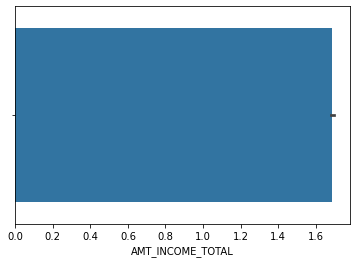

In [91]:
sns.barplot(app_data["AMT_INCOME_TOTAL"])
plt.show()

## Observation: More than 100% loan applicants have income amount in the range of 0-100K. 

### AMT_CREDIT 

In [92]:
# Creating bins for Credit amount
app_data['AMT_CREDIT']=app_data['AMT_CREDIT']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,100]
range = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k',
       '800k-900k','900k-1M', '1M Above']

app_data['AMT_CREDIT_RANGE']=pd.cut(app_data['AMT_CREDIT'],bins=bins,labels=range)

In [93]:
#checking the binning of data and % of data in each category

app_data['AMT_CREDIT_RANGE'].value_counts(normalize=True)*100

200k-300k    17.824728
1M Above     16.254703
500k-600k    11.131960
400k-500k    10.418489
100K-200K     9.801275
300k-400k     8.564897
600k-700k     7.820533
800k-900k     7.086576
700k-800k     6.241403
900k-1M       2.902986
0-100K        1.952450
Name: AMT_CREDIT_RANGE, dtype: float64

## OBSERVATION:More Than 16% loan applicants have taken loan which amounts to more than 1M. 

### DAYS_BIRTH -> AGE/AGE_GROUP

In [94]:
# Creating bins for Age
# Creating Age column using Days_Birth

app_data["AGE"]= app_data["DAYS_BIRTH"]//365

bins = [0,20,30,40,50,100]
range = ["0-20", "20-30", "30-40", "40-50", "50 above"]

# Creating Age_Group column
app_data["AGE_GROUP"] = pd.cut(app_data["AGE"], bins, labels=range)

In [95]:
app_data["AGE_GROUP"].value_counts(normalize=True)*100

50 above    31.604398
30-40       27.028952
40-50       24.194582
20-30       17.171743
0-20         0.000325
Name: AGE_GROUP, dtype: float64

##  OBSERVATION: 31% loan applicants have age above 50 years. More than 55% of loan applicants have age over 40 years.

### DAYS_EMPLOYED -> YEARS_EMPLOYED/YEARS_EMPLOYED_RANGE

In [96]:
# Creating bins for Employment Time
app_data["YEARS_EMPLOYED"] = app_data["DAYS_EMPLOYED"]//365
bins = [-1,5,10,20,30,40,50,60,1000]
range = ["0-5","5-10", "10-20", "20-30", "30-40", "40-50", "50-60", "60 Above"]

app_data["YEARS_EMPLOYED_RANGE"] = pd.cut(app_data["YEARS_EMPLOYED"],bins, labels=range)

In [97]:
app_data["YEARS_EMPLOYED_RANGE"].value_counts(normalize=True)*100

0-5         49.604079
5-10        18.205202
60 Above    18.007161
10-20       10.620108
20-30        2.734536
30-40        0.772005
40-50        0.056909
50-60        0.000000
Name: YEARS_EMPLOYED_RANGE, dtype: float64

In [98]:
app_data.YEARS_EMPLOYED_RANGE.isnull().sum()

0

## OBSERVATION: Around 50% of the loan applicants have work experience within 0-5 years and almost 70% of them have less than 10 years of work experience

In [99]:
#Checking the number of unique values each column possess to identify categorical columns
app_data.nunique().sort_values(ascending=False)

SK_ID_CURR                     307511
EXT_SOURCE_2                   119831
DAYS_BIRTH                      17460
DAYS_REGISTRATION               15688
AMT_ANNUITY                     13672
DAYS_EMPLOYED                   12574
DAYS_ID_PUBLISH                  6168
AMT_CREDIT                       5603
DAYS_LAST_PHONE_CHANGE           3773
AMT_INCOME_TOTAL                 2548
AMT_GOODS_PRICE                  1002
EXT_SOURCE_3                      814
REGION_POPULATION_RELATIVE         81
ORGANIZATION_TYPE                  58
YEARS_EMPLOYED                     51
AGE                                50
OBS_60_CNT_SOCIAL_CIRCLE           33
OBS_30_CNT_SOCIAL_CIRCLE           33
AMT_REQ_CREDIT_BUREAU_YEAR         25
AMT_REQ_CREDIT_BUREAU_MON          24
HOUR_APPR_PROCESS_START            24
OCCUPATION_TYPE                    19
CNT_FAM_MEMBERS                    17
CNT_CHILDREN                       15
AMT_CREDIT_RANGE                   11
AMT_INCOME_RANGE                   11
AMT_REQ_CRED

## Data Type Conversion

In [100]:
# inspecting the column types if they are in correct data type using the above result.
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 79 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307511 non-null  float64 
 10  AMT_GOODS_PRICE              307511 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

## Numeric columns are already in int64 and float64 format. Hence proceeding with other columns. 

In [101]:
app_data["WEEKDAY_APPR_PROCESS_START"] = app_data['WEEKDAY_APPR_PROCESS_START'].astype("category")


In [102]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 79 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307511 non-null  float64 
 10  AMT_GOODS_PRICE              307511 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

In [103]:
app_data["LIVE_CITY_NOT_WORK_CITY"] = app_data['LIVE_CITY_NOT_WORK_CITY'].astype("category")
app_data["REG_CITY_NOT_LIVE_CITY"] = app_data['REG_CITY_NOT_LIVE_CITY'].astype("category")
app_data["REG_CITY_NOT_WORK_CITY"] = app_data['REG_CITY_NOT_WORK_CITY'].astype("category")
app_data["REG_REGION_NOT_WORK_REGION"] = app_data['REG_REGION_NOT_WORK_REGION'].astype("category")
app_data["LIVE_REGION_NOT_WORK_REGION"] = app_data['LIVE_REGION_NOT_WORK_REGION'].astype("category")
app_data["REGION_RATING_CLIENT"] = app_data['REGION_RATING_CLIENT'].astype("category")
app_data["REGION_RATING_CLIENT_W_CITY"] = app_data['REGION_RATING_CLIENT_W_CITY'].astype("category")




In [104]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 79 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307511 non-null  float64 
 10  AMT_GOODS_PRICE              307511 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

In [105]:
app_data["ORGANIZATION_TYPE"] = app_data['ORGANIZATION_TYPE'].astype("category")
app_data["OCCUPATION_TYPE"] = app_data['OCCUPATION_TYPE'].astype("category")
app_data["NAME_HOUSING_TYPE"] = app_data['NAME_HOUSING_TYPE'].astype("category")
app_data["NAME_FAMILY_STATUS"] = app_data['NAME_FAMILY_STATUS'].astype("category")
app_data["NAME_EDUCATION_TYPE"] = app_data['NAME_EDUCATION_TYPE'].astype("category")
app_data["NAME_INCOME_TYPE"] = app_data['NAME_INCOME_TYPE'].astype("category")
app_data["NAME_TYPE_SUITE"] = app_data['NAME_TYPE_SUITE'].astype("category")
app_data["FLAG_OWN_REALTY"] = app_data['FLAG_OWN_REALTY'].astype("category")
app_data["FLAG_OWN_CAR"] = app_data['FLAG_OWN_CAR'].astype("category")
app_data["CODE_GENDER"] = app_data['CODE_GENDER'].astype("category")
app_data["NAME_CONTRACT_TYPE"] = app_data['NAME_CONTRACT_TYPE'].astype("category")


In [106]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 79 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  category
 5   FLAG_OWN_REALTY              307511 non-null  category
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307511 non-null  float64 
 10  AMT_GOODS_PRICE              307511 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

## Observation:- As per the observation numeric value is in (int64) & (float64) where as other coulmn were in object type, hence I changed it into category Dtype


### Standardize Values for previous_application


In [107]:
#Checking the number of unique values each column possess to identify categorical columns

pre_data.nunique().sort_values()

FLAG_LAST_APPL_PER_CONTRACT          2
NFLAG_LAST_APPL_IN_DAY               2
NAME_PRODUCT_TYPE                    3
NAME_CONTRACT_STATUS                 4
NAME_CONTRACT_TYPE                   4
NAME_CLIENT_TYPE                     4
NAME_PAYMENT_TYPE                    4
NAME_PORTFOLIO                       5
NAME_YIELD_GROUP                     5
WEEKDAY_APPR_PROCESS_START           7
CHANNEL_TYPE                         8
CODE_REJECT_REASON                   9
NAME_SELLER_INDUSTRY                11
PRODUCT_COMBINATION                 17
HOUR_APPR_PROCESS_START             24
NAME_CASH_LOAN_PURPOSE              25
NAME_GOODS_CATEGORY                 28
CNT_PAYMENT                         49
SELLERPLACE_AREA                  2097
DAYS_DECISION                     2922
AMT_CREDIT                       86803
AMT_GOODS_PRICE                  93885
AMT_APPLICATION                  93885
SK_ID_CURR                      338857
AMT_ANNUITY                     357959
SK_ID_PREV               

In [108]:
# inspecting the column types if the above conversion is reflected
pre_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 26 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1670214 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1670214 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

In [109]:
pre_data.DAYS_DECISION.describe()

count    1.670214e+06
mean    -8.806797e+02
std      7.790997e+02
min     -2.922000e+03
25%     -1.300000e+03
50%     -5.810000e+02
75%     -2.800000e+02
max     -1.000000e+00
Name: DAYS_DECISION, dtype: float64

In [110]:
# As DAYS_DECISION has negative values, hence converting negative days to positive days 
pre_data["DAYS_DECISION"] = abs(pre_data["DAYS_DECISION"])

In [111]:
pre_data.DAYS_DECISION.describe()

count    1.670214e+06
mean     8.806797e+02
std      7.790997e+02
min      1.000000e+00
25%      2.800000e+02
50%      5.810000e+02
75%      1.300000e+03
max      2.922000e+03
Name: DAYS_DECISION, dtype: float64

In [112]:
pre_data.DAYS_DECISION.value_counts(normalize=True)*100

245     0.146329
238     0.143095
210     0.142197
273     0.140701
196     0.138605
          ...   
2882    0.009759
2922    0.009699
2921    0.009460
2902    0.008861
1       0.000120
Name: DAYS_DECISION, Length: 2922, dtype: float64

In [113]:
pre_data.head(10)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,315000.0,SATURDAY,8,Y,1,Everyday expenses,Approved,684,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,18.0,low_normal,Cash X-Sell: low
6,2315218,175704,Cash loans,11250.000,0.0,0.0,45000.0,TUESDAY,11,Y,1,XNA,Canceled,14,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,12.0,XNA,Cash
7,1656711,296299,Cash loans,11250.000,0.0,0.0,45000.0,MONDAY,7,Y,1,XNA,Canceled,21,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,12.0,XNA,Cash
8,2367563,342292,Cash loans,11250.000,0.0,0.0,45000.0,MONDAY,15,Y,1,XNA,Canceled,386,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,12.0,XNA,Cash
9,2579447,334349,Cash loans,11250.000,0.0,0.0,45000.0,SATURDAY,15,Y,1,XNA,Canceled,57,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,12.0,XNA,Cash


In [114]:
# age group calculation 
pre_data["DECISION_GROUP"] = pre_data["DAYS_DECISION"] 
bins = [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800]
range = ["0-400","400-800", "800-1600", "1600-2000", "2000-2400", "2400-2800", "2800-3200", "3200 Above"]

pre_data["DAYS_DECISION_GROUP"] = pd.cut(pre_data["DECISION_GROUP"],bins, labels=range)

In [115]:
pre_data["DAYS_DECISION_GROUP"].value_counts(normalize=True)*100

0-400         32.410165
400-800       19.577822
800-1600      13.831971
1600-2000     10.188448
2000-2400      7.940159
2400-2800      5.960818
2800-3200      5.564164
3200 Above     4.526452
Name: DAYS_DECISION_GROUP, dtype: float64

## Observation:Almost 32% loan applicants have applied for a new loan within 0-400 days of previous loan decision 

In [116]:
pre_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 28 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_PREV                   1670214 non-null  int64   
 1   SK_ID_CURR                   1670214 non-null  int64   
 2   NAME_CONTRACT_TYPE           1670214 non-null  object  
 3   AMT_ANNUITY                  1670214 non-null  float64 
 4   AMT_APPLICATION              1670214 non-null  float64 
 5   AMT_CREDIT                   1670213 non-null  float64 
 6   AMT_GOODS_PRICE              1670214 non-null  float64 
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object  
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64   
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object  
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64   
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object  
 12  NAME_CONTRACT_STATUS        

In [117]:
# Converting  columns from Object to categorical 

pre_data["PRODUCT_COMBINATION"] = pre_data["PRODUCT_COMBINATION"].astype("category")
pre_data["NAME_YIELD_GROUP"] = pre_data["NAME_YIELD_GROUP"].astype("category")
pre_data["NAME_SELLER_INDUSTRY"] = pre_data["NAME_SELLER_INDUSTRY"].astype("category")
pre_data["CHANNEL_TYPE"] = pre_data["CHANNEL_TYPE"].astype("category")
pre_data["NAME_PRODUCT_TYPE"] = pre_data["NAME_PRODUCT_TYPE"].astype("category")
pre_data["NAME_PORTFOLIO"] = pre_data["NAME_PORTFOLIO"].astype("category")
pre_data["NAME_GOODS_CATEGORY"] = pre_data["NAME_GOODS_CATEGORY"].astype("category")
pre_data["NAME_CLIENT_TYPE"] = pre_data["NAME_CLIENT_TYPE"].astype("category")
pre_data["CODE_REJECT_REASON"] = pre_data["CODE_REJECT_REASON"].astype("category")
pre_data["NAME_PAYMENT_TYPE"] = pre_data["NAME_PAYMENT_TYPE"].astype("category")
pre_data["NAME_CONTRACT_STATUS"] = pre_data["NAME_CONTRACT_STATUS"].astype("category")
pre_data["NAME_CASH_LOAN_PURPOSE"] = pre_data["NAME_CASH_LOAN_PURPOSE"].astype("category")
pre_data["FLAG_LAST_APPL_PER_CONTRACT"] = pre_data["FLAG_LAST_APPL_PER_CONTRACT"].astype("category")
pre_data["WEEKDAY_APPR_PROCESS_START"] = pre_data["WEEKDAY_APPR_PROCESS_START"].astype("category")
pre_data["NAME_CONTRACT_TYPE"] = pre_data["NAME_CONTRACT_TYPE"].astype("category")


In [118]:
pre_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 28 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_PREV                   1670214 non-null  int64   
 1   SK_ID_CURR                   1670214 non-null  int64   
 2   NAME_CONTRACT_TYPE           1670214 non-null  category
 3   AMT_ANNUITY                  1670214 non-null  float64 
 4   AMT_APPLICATION              1670214 non-null  float64 
 5   AMT_CREDIT                   1670213 non-null  float64 
 6   AMT_GOODS_PRICE              1670214 non-null  float64 
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  category
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64   
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  category
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64   
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  category
 12  NAME_CONTRACT_STATUS        

In [119]:
pre_data.drop("DECISION_GROUP", axis=1, inplace=True)


In [120]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 79 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  category
 5   FLAG_OWN_REALTY              307511 non-null  category
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307511 non-null  float64 
 10  AMT_GOODS_PRICE              307511 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

## Null Value Data Imputation

### Identifying the outliers

### Finding outlier information in application_data


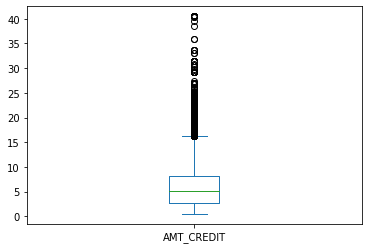

In [121]:
app_data.AMT_CREDIT.plot.box()
plt.show()

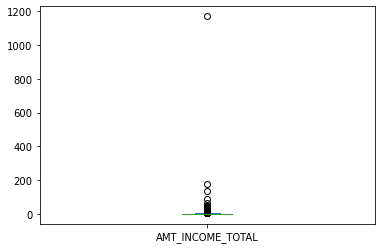

In [122]:
app_data.AMT_INCOME_TOTAL.plot.box()
plt.show()

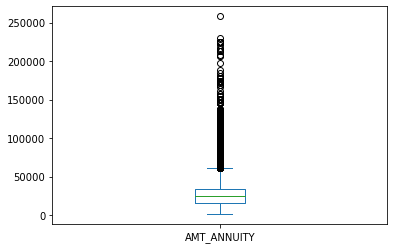

In [123]:
app_data.AMT_ANNUITY.plot.box()
plt.show()

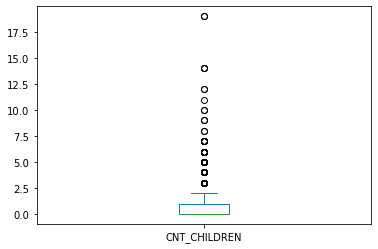

In [124]:
app_data.CNT_CHILDREN.plot.box()
plt.show()

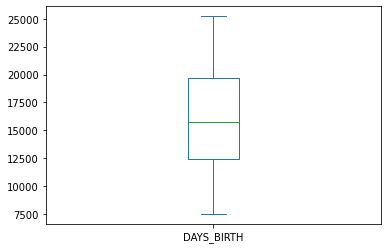

In [125]:
app_data.DAYS_BIRTH.plot.box()
plt.show()

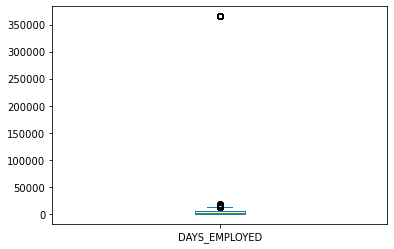

In [126]:
app_data.DAYS_EMPLOYED.plot.box()
plt.show()

## Observation:From current application data

#### AMT_ANNUITY, AMT_CREDIT, AMT_GOODS_PRICE,CNT_CHILDREN have some number of outliers.
#### AMT_INCOME_TOTAL has huge number of outliers which indicate that few of the loan applicants have high income when compared to the others.
#### DAYS_BIRTH has no outliers which means the data available is reliable.
#### DAYS_EMPLOYED has outlier values around 350000(days) which is around 958 years which is impossible and hence this has to be incorrect entry.
#### We can see the stats for these columns below as well. 

In [127]:
app_data[['AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_BIRTH','CNT_CHILDREN','DAYS_EMPLOYED']].describe()

,AMT_ANNUITY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_BIRTH,CNT_CHILDREN,DAYS_EMPLOYED
count,307511.000000,307511.000000,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000
mean,27108.487841,1.687979,5.990260,5.383163e+05,16036.995067,0.417052,67724.742149
std,14493.461065,2.371231,4.024908,3.692890e+05,4363.988632,0.722121,139443.751806
min,1615.500000,0.256500,0.450000,4.050000e+04,7489.000000,0.000000,0.000000
25%,16524.000000,1.125000,2.700000,2.385000e+05,12413.000000,0.000000,933.000000
50%,24903.000000,1.471500,5.135310,4.500000e+05,15750.000000,0.000000,2219.000000
75%,34596.000000,2.025000,8.086500,6.795000e+05,19682.000000,1.000000,5707.000000
max,258025.500000,1170.000000,40.500000,4.050000e+06,25229.000000,19.000000,365243.000000


## Finding outlier information in previous_application


In [128]:
pre_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 27 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_PREV                   1670214 non-null  int64   
 1   SK_ID_CURR                   1670214 non-null  int64   
 2   NAME_CONTRACT_TYPE           1670214 non-null  category
 3   AMT_ANNUITY                  1670214 non-null  float64 
 4   AMT_APPLICATION              1670214 non-null  float64 
 5   AMT_CREDIT                   1670213 non-null  float64 
 6   AMT_GOODS_PRICE              1670214 non-null  float64 
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  category
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64   
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  category
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64   
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  category
 12  NAME_CONTRACT_STATUS        

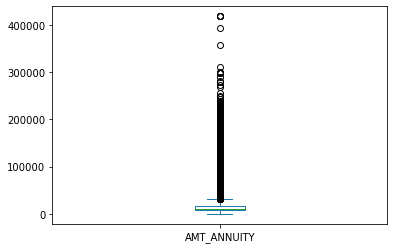

In [129]:
pre_data.AMT_ANNUITY.plot.box()
plt.show()

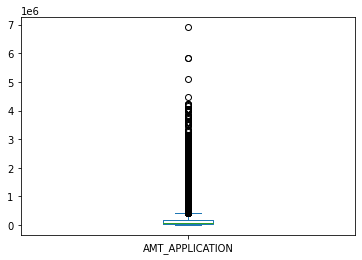

In [130]:
pre_data.AMT_APPLICATION.plot.box()
plt.show()

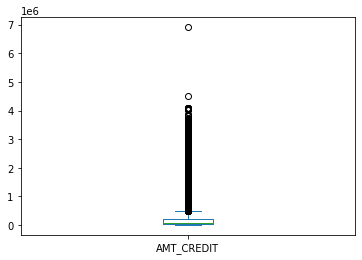

In [131]:
pre_data.AMT_CREDIT.plot.box()
plt.show()

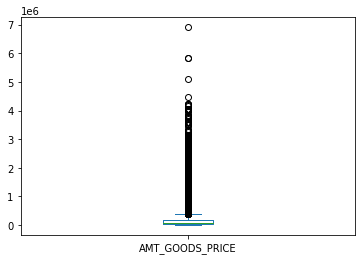

In [132]:
pre_data.AMT_GOODS_PRICE.plot.box()
plt.show()

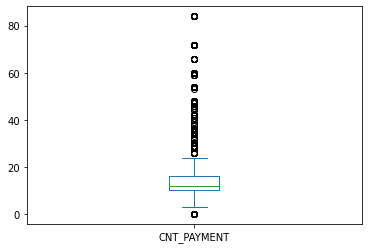

In [133]:
pre_data.CNT_PAYMENT.plot.box()
plt.show()

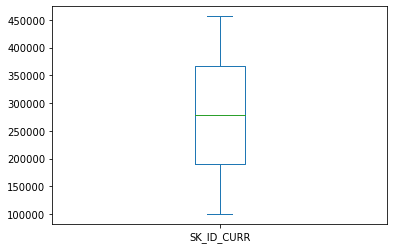

In [134]:
pre_data.SK_ID_CURR.plot.box()
plt.show()

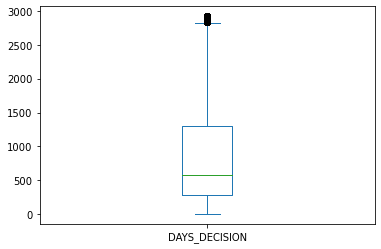

In [135]:
pre_data.DAYS_DECISION.plot.box()
plt.show()

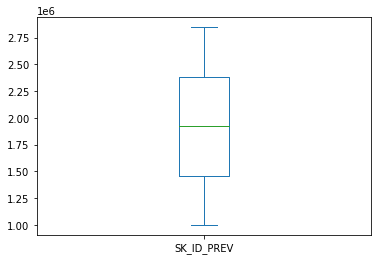

In [136]:
pre_data.SK_ID_PREV.plot.box()
plt.show()

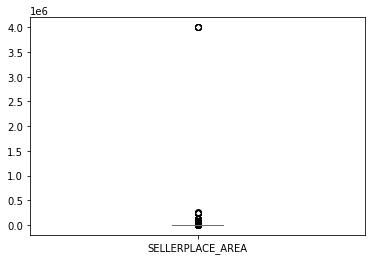

In [137]:
pre_data.SELLERPLACE_AREA.plot.box()
plt.show()

## Insight: It can be seen that in previous application data

#### AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE, SELLERPLACE_AREA have huge number of outliers.
#### CNT_PAYMENT has few outlier values
#### SK_ID_CURR & SK_ID_PREV is an ID column and hence no outliers.
#### DAYS_DECISION has little number of outliers indicating that these previous applications decisions were taken long back.
#### We can see the stats for these columns below as well. 

In [138]:
pre_data[['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'SELLERPLACE_AREA','CNT_PAYMENT','DAYS_DECISION']].describe()


,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_DECISION
count,1.670214e+06,1.670214e+06,1.670213e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06
mean,1.490651e+04,1.752339e+05,1.961140e+05,1.856429e+05,3.139511e+02,1.515057e+01,8.806797e+02
std,1.317751e+04,2.927798e+05,3.185746e+05,2.871413e+05,7.127443e+03,1.295220e+01,7.790997e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,1.000000e+00
25%,7.547096e+03,1.872000e+04,2.416050e+04,4.500000e+04,-1.000000e+00,1.000000e+01,2.800000e+02
50%,1.125000e+04,7.104600e+04,8.054100e+04,7.105050e+04,3.000000e+00,1.200000e+01,5.810000e+02
75%,1.682403e+04,1.803600e+05,2.164185e+05,1.804050e+05,8.200000e+01,1.600000e+01,1.300000e+03
max,4.180581e+05,6.905160e+06,6.905160e+06,6.905160e+06,4.000000e+06,8.400000e+01,2.922000e+03


## Data Analysis

Imbalance Analysis


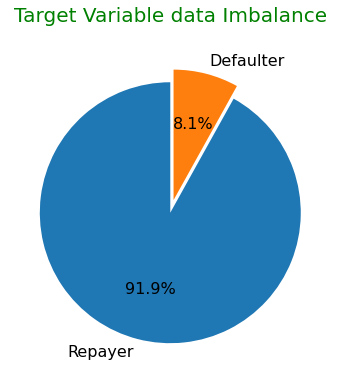

In [139]:
# Showing imbalance in a Pie Chart
lables = 'Repayer','Defaulter'
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Very good')
plt.figure(figsize = [6,6])

plt.pie(app_data["TARGET"].value_counts(), explode=explode, labels=lables, autopct='%1.1f%%', 
        textprops={'fontsize': 16, 'fontweight' : 20, 'color' : 'Black'}, startangle=90)

# Adding and formatting title
plt.title("Target Variable data Imbalance\n", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.show()

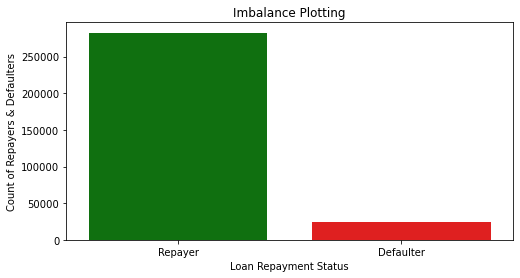

In [140]:
# showing Imbalance as a Barplot

plt.figure(figsize=(8,4))
x= ['Repayer','Defaulter']
sns.barplot(x,"TARGET",data = app_data["TARGET"].value_counts().reset_index(),palette= ['g','r'])
plt.xlabel("Loan Repayment Status")
plt.ylabel("Count of Repayers & Defaulters")
plt.title("Imbalance Plotting")
plt.show()

In [141]:
# Dividing the original dataset into two different datasets depending upon the target value
target0 = app_data.loc[app_data.TARGET == 0]
target1 = app_data.loc[app_data.TARGET == 1]
print("Dataframe for Records with Target Variable as 0: ",target0.shape)
print("Dataframe for Records with Target Variable as 1: ",target1.shape)

Dataframe for Records with Target Variable as 0:  (282686, 79)
Dataframe for Records with Target Variable as 1:  (24825, 79)


In [142]:
target0_perc = round(target0.shape[0]/(target0.shape[0]+target1.shape[0])*100,2)
target1_perc = round(target1.shape[0]/(target0.shape[0]+target1.shape[0])*100,2)

In [143]:
print('Ratios of imbalance for Repayer and Defaulter in Percentage is:',target0_perc,'and' ,target1_perc)
print('Ratios of imbalance for Repayer Vs Defaulter is:',round((target0_perc/target1_perc),2),":1 approx")

Ratios of imbalance for Repayer and Defaulter in Percentage is: 91.93 and 8.07
Ratios of imbalance for Repayer Vs Defaulter is: 11.39 :1 approx


## Plotting Functions

### Following are the reusable functions customized to perform data analysis: 

In [144]:
def create_pie_plot(Column,dataframe):
    #lables = dataframe[Column].value_counts()
    lables = list(pd.unique(dataframe[Column]))
    #explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Very good')
    plt.figure(figsize = [6,6])

    #dataframe[Column].value_counts()
    plt.pie(dataframe[Column].value_counts(), labels=lables, autopct='%1.1f%%', 
            textprops={'fontsize': 15, 'fontweight' : 15, 'color' : 'Black'}, startangle=90,labeldistance=1.05)
    #plt.legend(bbox_to_anchor=(1,0), loc="center right", fontsize=12, bbox_transform=plt.gcf().transFigure)
    plt.legend(bbox_to_anchor=(1, 0, 0.5, 1), loc="center left", fontsize=12, bbox_transform=plt.gcf().transFigure)
   
    title = "Distribution of "+ Column.title() + " Variable"
    plt.title(title, fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})

    plt.show()

In [145]:
def create_pie_plot2(Column,dataframe):
    plt.figure(figsize=[15,7])
    dataframe[Column].value_counts(normalize=True).plot.pie(autopct='%1.1f%%',textprops={'fontsize': 8, 'fontweight' : 8, 'color' : 'Black'},labeldistance=1.05)
    title = "Distribution of "+ Column.title() + " Variable"
    plt.title(title, fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
    plt.ylabel("")
    plt.show()

In [146]:
def create_barh_plot(Column,dataframe):
    plt.figure(figsize = (15,20))
    dataframe[Column].value_counts().plot.barh()
    title = "Distribution of "+ Column.title() + " Variable"
    plt.title(title,color="blue", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'blue'})
    plt.xticks(size=15,color='Black')
    plt.show()

In [147]:
def create_bar_plot(Column,dataframe):
    dataframe[Column].value_counts().plot.bar()
    title = "Distribution of "+ Column.title() + " Variable"
    plt.title(title,color="blue", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'blue'})
    plt.xticks(size=15,color='Black')
    plt.show()

In [148]:
def create_hist_plot(Column,dataframe):
    dataframe[Column].value_counts().plot.hist()
    title = "Distribution of "+ Column.title() + " Variable"
    plt.title(title,color="Green", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
    plt.show()

In [149]:
def create_dist_plot(Column,dataframe):
    sns.set_style("dark")
    sns.distplot(dataframe.Column,bins=20,color="Green")
    title = "Distribution of "+ Column.title() + " Variable"
    plt.title(title,color="Green", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
    plt.show()

In [150]:
# function for plotting repetitive countplots in univariate categorical analysis on application_data
# This function will create two subplots: 
# 1. Count plot of categorical column w.r.t TARGET; 
# 2. Percentage of defaulters within column

def univariate_categorical(feature,ylog=False,label_rotation=False,horizontal_layout=True):
    temp = app_data[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = app_data[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc["TARGET"] = cat_perc["TARGET"]*100
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20,24))
        
    # 1. Subplot 1: Count plot of categorical column
    s = sns.countplot(ax=ax1, 
                    x = feature, 
                    data=app_data,
                    hue ="TARGET",
                    order=cat_perc[feature],
                    palette=['g','r'])
    
    # Define common styling
    ax1.set_title(feature, fontdict={'fontsize' : 20, 'fontweight' : 20, 'color' : 'Blue'}) 
    ax1.legend(['Repayer','Defaulter'])
    s.set_xlabel("")
   
    # If the plot is not readable, use the log scale.
    if ylog:
        ax1.set_yscale('log')
        ax1.set_ylabel("Count (log)",fontdict={'fontsize' : 15, 'fontweight' : 3, 'color' : 'Blue'})   
        ax1.set_xlabel("")
        ax1.tick_params(axis='both', which='major', labelsize=15)
    else:        
        ax1.set_ylabel("Count",fontdict={'fontsize' : 15, 'fontweight' : 3, 'color' : 'Blue'})   
        ax1.set_xlabel("")
        ax1.tick_params(axis='both', which='major', labelsize=15)        
        
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
        s.set_xlabel("")
    # 2. Subplot 2: Percentage of defaulters within the categorical column
    s = sns.barplot(ax=ax2, 
                    x = feature, 
                    y='TARGET', 
                    order=cat_perc[feature], 
                    data=cat_perc,
                    palette='Set2')
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
        s.set_xlabel("")
    plt.ylabel('Percent of Defaulters [%]', fontsize=15,fontweight=3, color='Blue')
    plt.tick_params(axis='both', which='major', labelsize=15)
    ax2.set_title(feature + " Defaulter %", fontdict={'fontsize' : 20, 'fontweight' : 20, 'color' : 'Blue'}) 
    ax2.set_xlabel("")
    plt.show();

In [151]:
# function for plotting repetitive countplots in univariate categorical analysis on application_data
# This function will create two subplots: 
# 1. Count plot of categorical column w.r.t TARGET; 
# 2. Percentage of defaulters within column

def univariate_categorical2(feature,ylog=False,label_rotation=False,horizontal_layout=True):
    temp = app_data[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = app_data[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc["TARGET"] = cat_perc["TARGET"]*100
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20,24))
        
    # 1. Subplot 1: Count plot of categorical column
    # sns.set_palette("Set2")
    s = sns.countplot(ax=ax1, 
                    x = feature, 
                    data=app_data,
                    hue ="TARGET",
                    order=cat_perc[feature],
                    palette=['g','r'])
    
    # Define common styling
    ax1.set_title(feature, fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'}) 
    ax1.legend(['Repayer','Defaulter'])
    
    # If the plot is not readable, use the log scale.
    if ylog:
        ax1.set_yscale('log')
        ax1.set_ylabel("Count (log)",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})   
    
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    # 2. Subplot 2: Percentage of defaulters within the categorical column
    s = sns.barplot(ax=ax2, 
                    x = feature, 
                    y='TARGET', 
                    order=cat_perc[feature], 
                    data=cat_perc,
                    palette='Set2')
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of Defaulters [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)
    ax2.set_title(feature + " Defaulter %", fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 

    plt.show();

In [152]:
# function for plotting repetitive countplots in bivariate categorical analysis

def bivariate_bar(x,y,df,hue,figsize):
    
    plt.figure(figsize=figsize)
    sns.barplot(x=x,
                  y=y,
                  data=df, 
                  hue=hue, 
                  palette =['g','r'])     
        
    # Defining aesthetics of Labels and Title of the plot using style dictionaries
    plt.xlabel(x,fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})    
    plt.ylabel(y,fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})    
    plt.title(col, fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    plt.xticks(rotation=90, ha='right')
    plt.legend(labels = ['Repayer','Defaulter'])
    plt.show()

In [153]:
# function for plotting repetitive rel plots in bivaritae numerical analysis on application_data

def bivariate_rel(x,y,data, hue, kind, palette, legend,figsize):
    
    plt.figure(figsize=figsize)
    sns.relplot(x=x, 
                y=y, 
                data=app_data, 
                hue="TARGET",
                kind=kind,
                palette = ['g','r'],
                legend = False)
    plt.legend(['Repayer','Defaulter'])
    plt.xticks(rotation=90, ha='right')
    plt.show()

In [154]:
#function for plotting repetitive countplots in univariate categorical analysis on the merged df

def univariate_merged(col,df,hue,palette,ylog,figsize):
    plt.figure(figsize=figsize)
    ax=sns.countplot(x=col, 
                  data=df,
                  hue= hue,
                  palette= palette,
                  order=df[col].value_counts().index)
    

    if ylog:
        plt.yscale('log')
        plt.ylabel("Count (log)",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})     
    else:
        plt.ylabel("Count",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})       

    plt.title(col , fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    plt.legend(loc = "upper right")
    plt.xticks(rotation=90, ha='right')
    
    plt.show()

In [233]:
# Function to plot point plots on merged dataframe

def merged_pointplot(x,y):
    plt.figure(figsize=(8,4))
    sns.pointplot(x=x, 
                  y=y, 
                  hue="TARGET", 
                  data=merged_sid,
                  palette =['g','r'])
   # plt.legend(['Repayer','Defaulter'])

##  Categorical Variables Analysis

### Segmented Univariate Analysis


### NAME_CONTRACT_TYPE

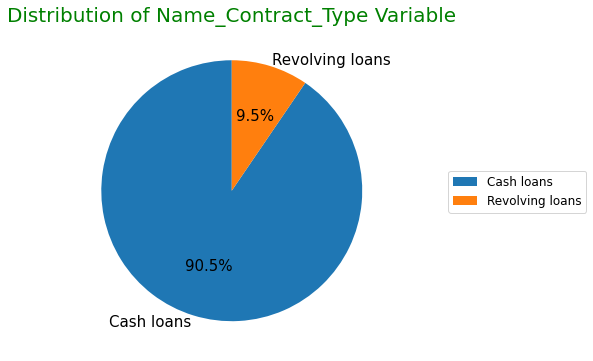

In [156]:
# Distribution based on Contract Type of Loan - Revolving or Cash Loans
create_pie_plot('NAME_CONTRACT_TYPE',app_data)


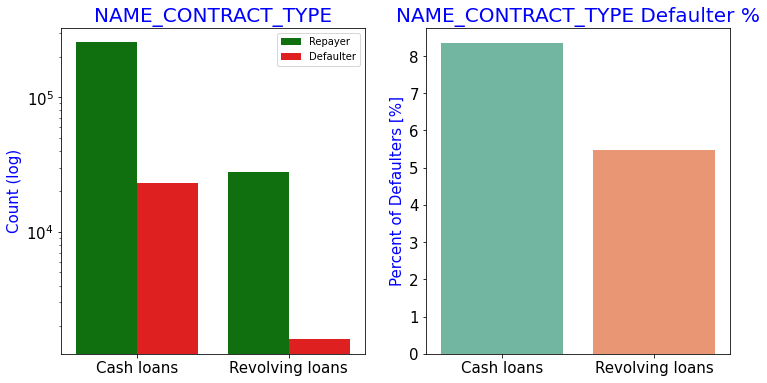

In [157]:
# Checking the contract type based on loan repayment status
univariate_categorical('NAME_CONTRACT_TYPE',True)

## Inferences: Contract type: Revolving loans are just a small fraction (10%) from the total number of loans; Also majority of the Revolving loans have been defaulted.

## CODE_GENDER


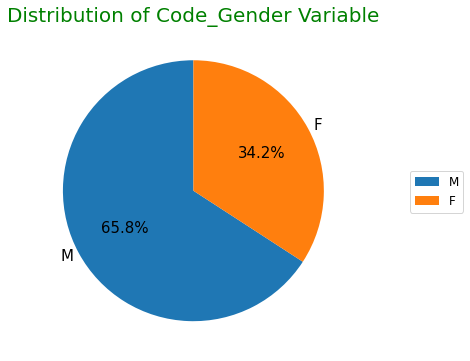

In [158]:
# Distribution of the people bases on Gender
create_pie_plot('CODE_GENDER',app_data)

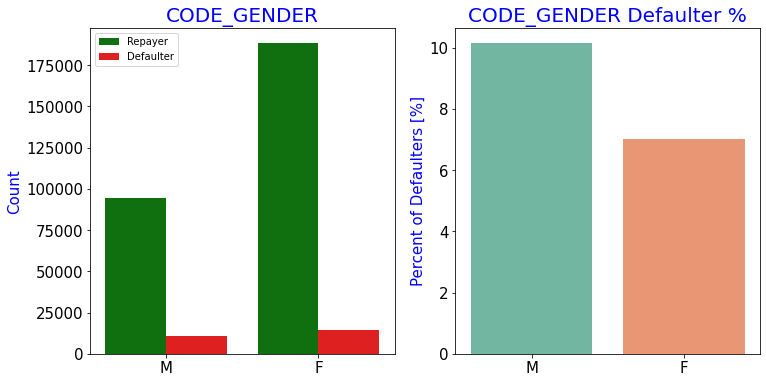

In [159]:
# Checking the type of Gender on loan repayment status
univariate_categorical('CODE_GENDER')

## Inferences: The number of female clients is almost double the number of male clients. Based on the percentage of defaulted credits, males have a higher chance of not returning their loans (approx 10%), comparing with women (~7%) 

## FLAG_OWN_CAR
 

In [160]:
app_data.FLAG_OWN_CAR.value_counts(normalize=True)*100

N    65.989184
Y    34.010816
Name: FLAG_OWN_CAR, dtype: float64

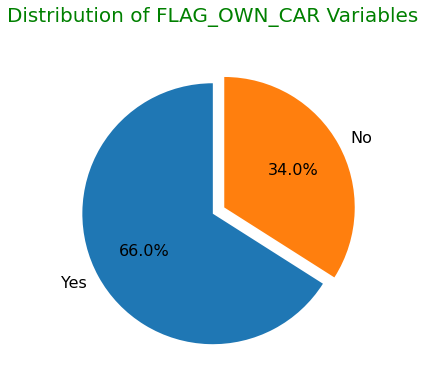

In [161]:
# Distribution based on Car owned Type of Loan - Yes or No
# Showing imbalance in a Pie Chart
lables = 'Yes','No'
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Very good')
plt.figure(figsize = [6,6])

plt.pie(app_data["FLAG_OWN_CAR"].value_counts(), explode=explode, labels=lables, autopct='%1.1f%%', 
        textprops={'fontsize': 16, 'fontweight' : 20, 'color' : 'Black'}, startangle=90)

# Adding and formatting title
plt.title("Distribution of FLAG_OWN_CAR Variables\n", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.show()

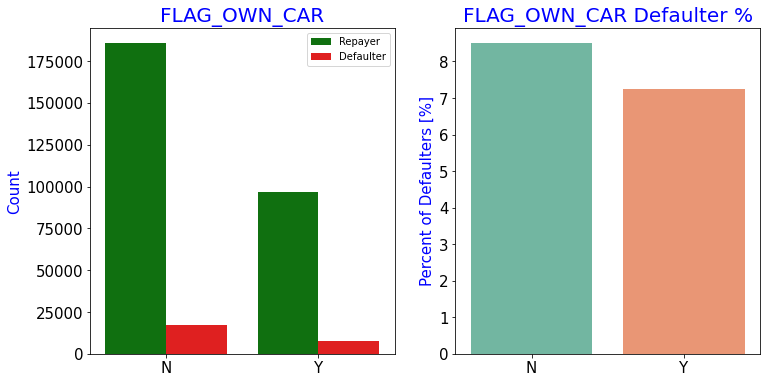

In [162]:
# Checking if owning a car is related to loan repayment status
univariate_categorical('FLAG_OWN_CAR')

## Inferences: Clients who own a car are half in number of the clients who don't own a car. But based on the percentage of default, there is no correlation between owning a car and loan repayment as in both cases the default percentage is almost same. 

## FLAG_OWN_REALTY 

In [163]:
app_data.FLAG_OWN_REALTY.value_counts(normalize=True)*100

Y    69.367275
N    30.632725
Name: FLAG_OWN_REALTY, dtype: float64

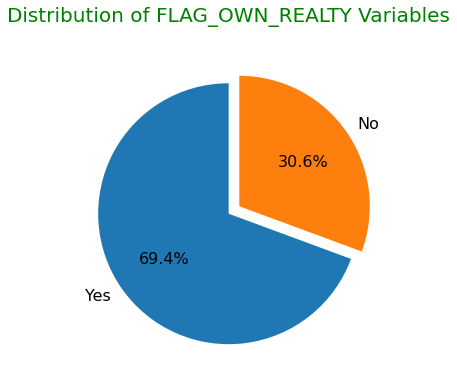

In [164]:
# Distribution based on Flag Reality Type of Loan - Yes or No
# Showing imbalance in a Pie Chart
lables = 'Yes','No'
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Very good')
plt.figure(figsize = [6,6])

plt.pie(app_data["FLAG_OWN_REALTY"].value_counts(), explode=explode, labels=lables, autopct='%1.1f%%', 
        textprops={'fontsize': 16, 'fontweight' : 20, 'color' : 'Black'}, startangle=90)

# Adding and formatting title
plt.title("Distribution of FLAG_OWN_REALTY Variables\n", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.show()

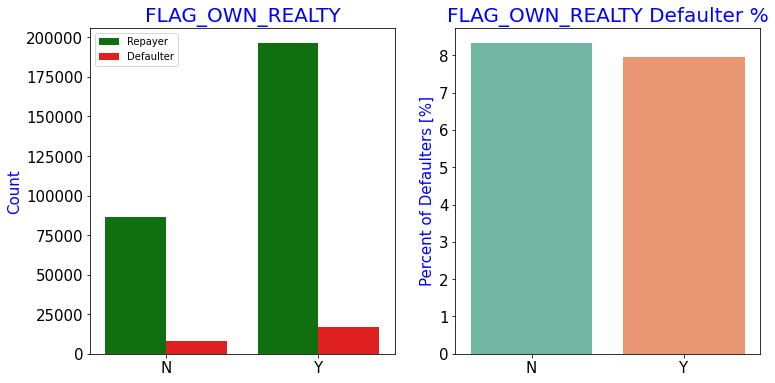

In [165]:
# Checking if owning a realty is related to loan repayment status
univariate_categorical('FLAG_OWN_REALTY')

##   Inferences: The clients who own real estate are more than double of the ones that don't own. But the defaulting rate of both categories are around the same (~8%). Thus there is no correlation between owning a reality and defaulting the loan.

## NAME_HOUSING_TYPE

In [166]:
app_data.NAME_HOUSING_TYPE.value_counts(normalize=True)*100

House / apartment      88.734387
With parents            4.825844
Municipal apartment     3.636618
Rented apartment        1.587260
Office apartment        0.851026
Co-op apartment         0.364865
Name: NAME_HOUSING_TYPE, dtype: float64

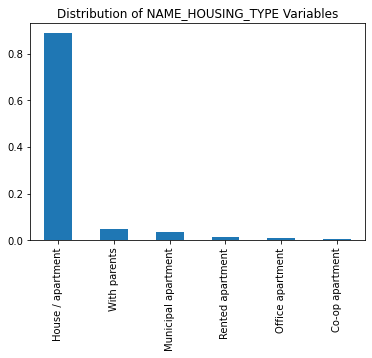

In [167]:
# Distribution based on Housing Type of Loan - House / apartment, With parents, Municipal apartment,Rented apartment, Office apartment, Co-op apartment  
# Showing imbalance in a bar chart
lables = 'House / apartment','With parents', "Municipal apartment", "Rented apartment", "Office apartment", "Co-op apartment" 

app_data.NAME_HOUSING_TYPE.value_counts(normalize=True).plot.bar()
plt.title("Distribution of NAME_HOUSING_TYPE Variables")
plt.show()

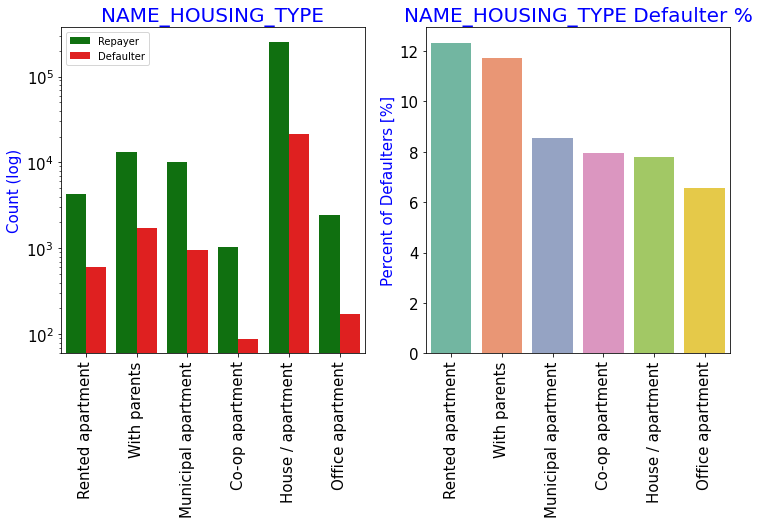

In [168]:
# Analyzing Housing Type based on loan repayment status
univariate_categorical("NAME_HOUSING_TYPE",True,True,True)

## Inferences:

#### Majority of people live in House/apartment
#### People living in office apartments have lowest default rate
#### People living with parents (around 11.5%) and living in rented apartments(> 12%) have higher probability of defaulting 

##  NAME_FAMILY_STATUS


In [169]:
app_data.NAME_FAMILY_STATUS.value_counts(normalize=True)*100

Married                 63.878040
Single / not married    14.778008
Civil marriage           9.682580
Separated                6.429038
Widow                    5.231683
Unknown                  0.000650
Name: NAME_FAMILY_STATUS, dtype: float64

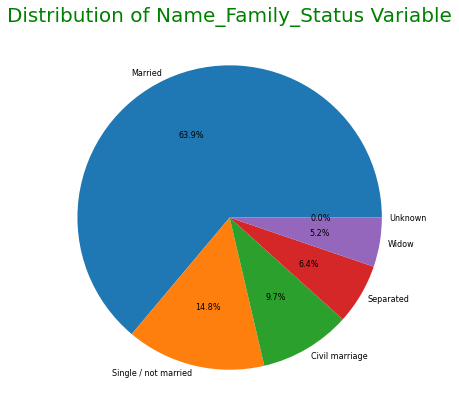

In [170]:
# Distribution based on Name Family Type of Loan - Married','Single / not married','Civil marriage', 'Separated', 'Widow', 'Unknown'
# Showing imbalance in a bar Chart
create_pie_plot2("NAME_FAMILY_STATUS",app_data)
plt.show()

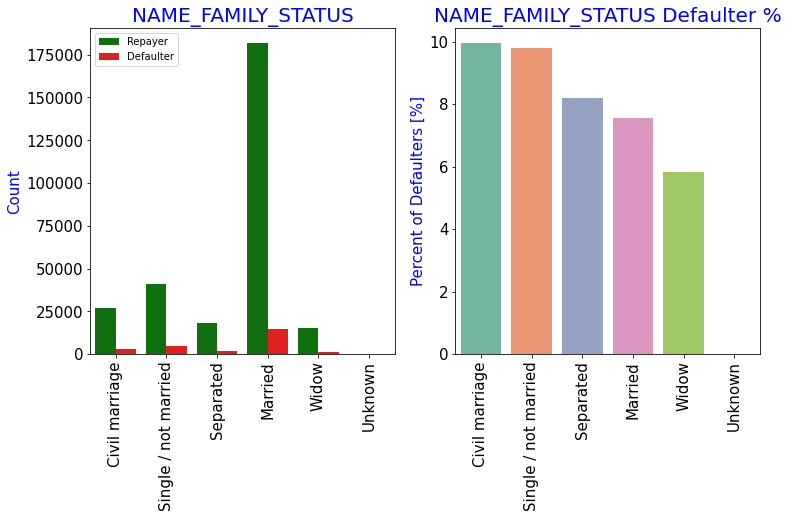

In [171]:
# Analyzing Family status based on loan repayment status
univariate_categorical("NAME_FAMILY_STATUS",False,True,True)

## Inferences:

#### Most of the people who have taken loan are married, followed by Single/not married and civil marriage
#### In terms of percentage of not repayment of loan, Civil marriage has the highest percent of not repayment (10%), with Widow the lowest (exception being Unknown). 

## NAME_EDUCATION_TYPE 

In [172]:
app_data.NAME_EDUCATION_TYPE.value_counts(normalize=True)*100

Secondary / secondary special    71.018923
Higher education                 24.344820
Incomplete higher                 3.341994
Lower secondary                   1.240931
Academic degree                   0.053331
Name: NAME_EDUCATION_TYPE, dtype: float64

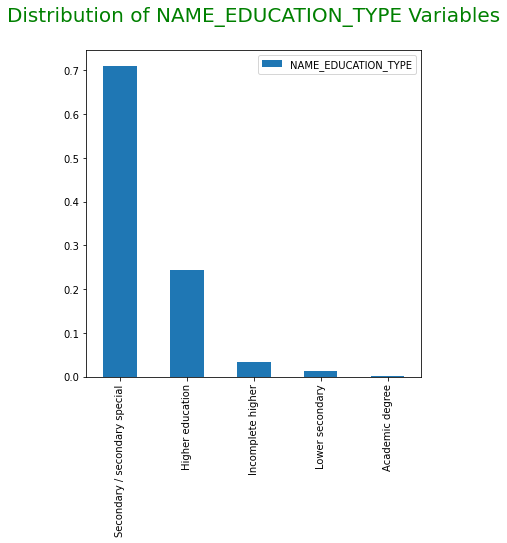

In [173]:
# Distribution based on Family Status Type of Loan - House / apartment, With parents, Municipal apartment,Rented apartment, Office apartment, Co-op apartment  
# Showing imbalance in a bar chart
plt.figure(figsize = [6,6])
app_data.NAME_EDUCATION_TYPE.value_counts(normalize= True).plot.bar()
plt.title("Distribution of NAME_EDUCATION_TYPE Variables\n", fontdict={"fontsize":20, "fontweight":5, "color":"Green"})
plt.legend()
plt.show()

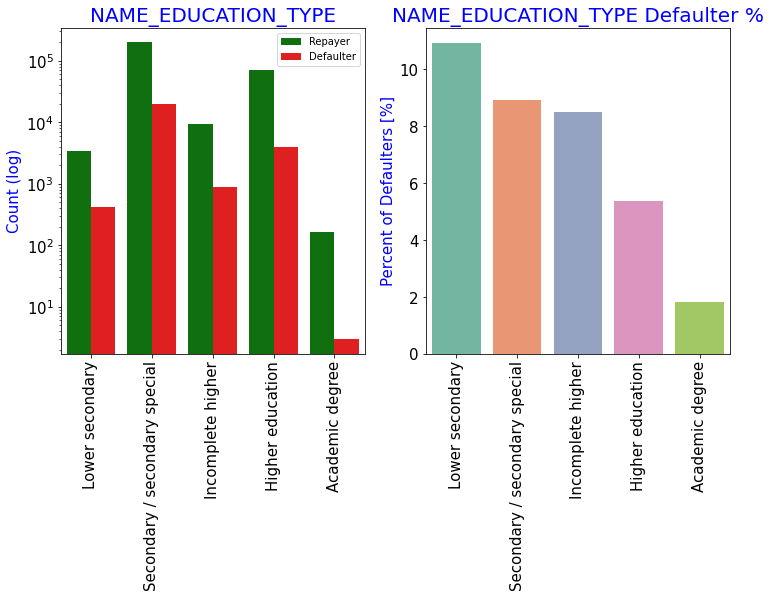

In [174]:
# Analyzing Education Type based on loan repayment status
univariate_categorical("NAME_EDUCATION_TYPE",True,True,True)

## Inferences:

#### Majority of the clients have Secondary / secondary special education, followed by clients with Higher education. Only a very small number having an academic degree

#### The Lower secondary category, although rare, have the largest rate of defaulters (11%). The people with Academic degree have the lowest defaulting rate(around 2%). 

## NAME_INCOME_TYPE 

In [175]:
app_data.NAME_INCOME_TYPE.value_counts(normalize=True)*100

Working                 51.631974
Commercial associate    23.289248
Pensioner               18.003258
State servant            7.057634
Unemployed               0.007154
Student                  0.005853
Businessman              0.003252
Maternity leave          0.001626
Name: NAME_INCOME_TYPE, dtype: float64

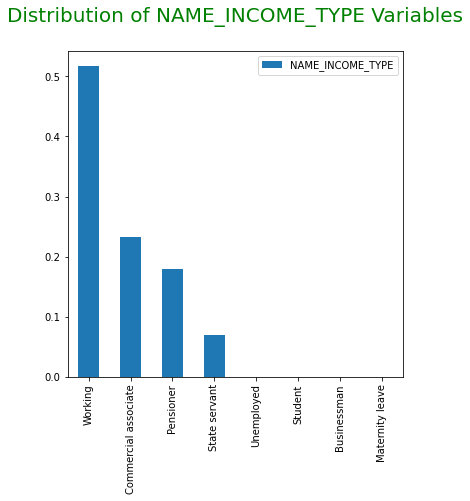

In [176]:
plt.figure(figsize = [6,6])
app_data.NAME_INCOME_TYPE.value_counts(normalize= True).plot.bar()
plt.title("Distribution of NAME_INCOME_TYPE Variables\n", fontdict={"fontsize":20, "fontweight":5, "color":"Green"})
plt.legend()
plt.show()

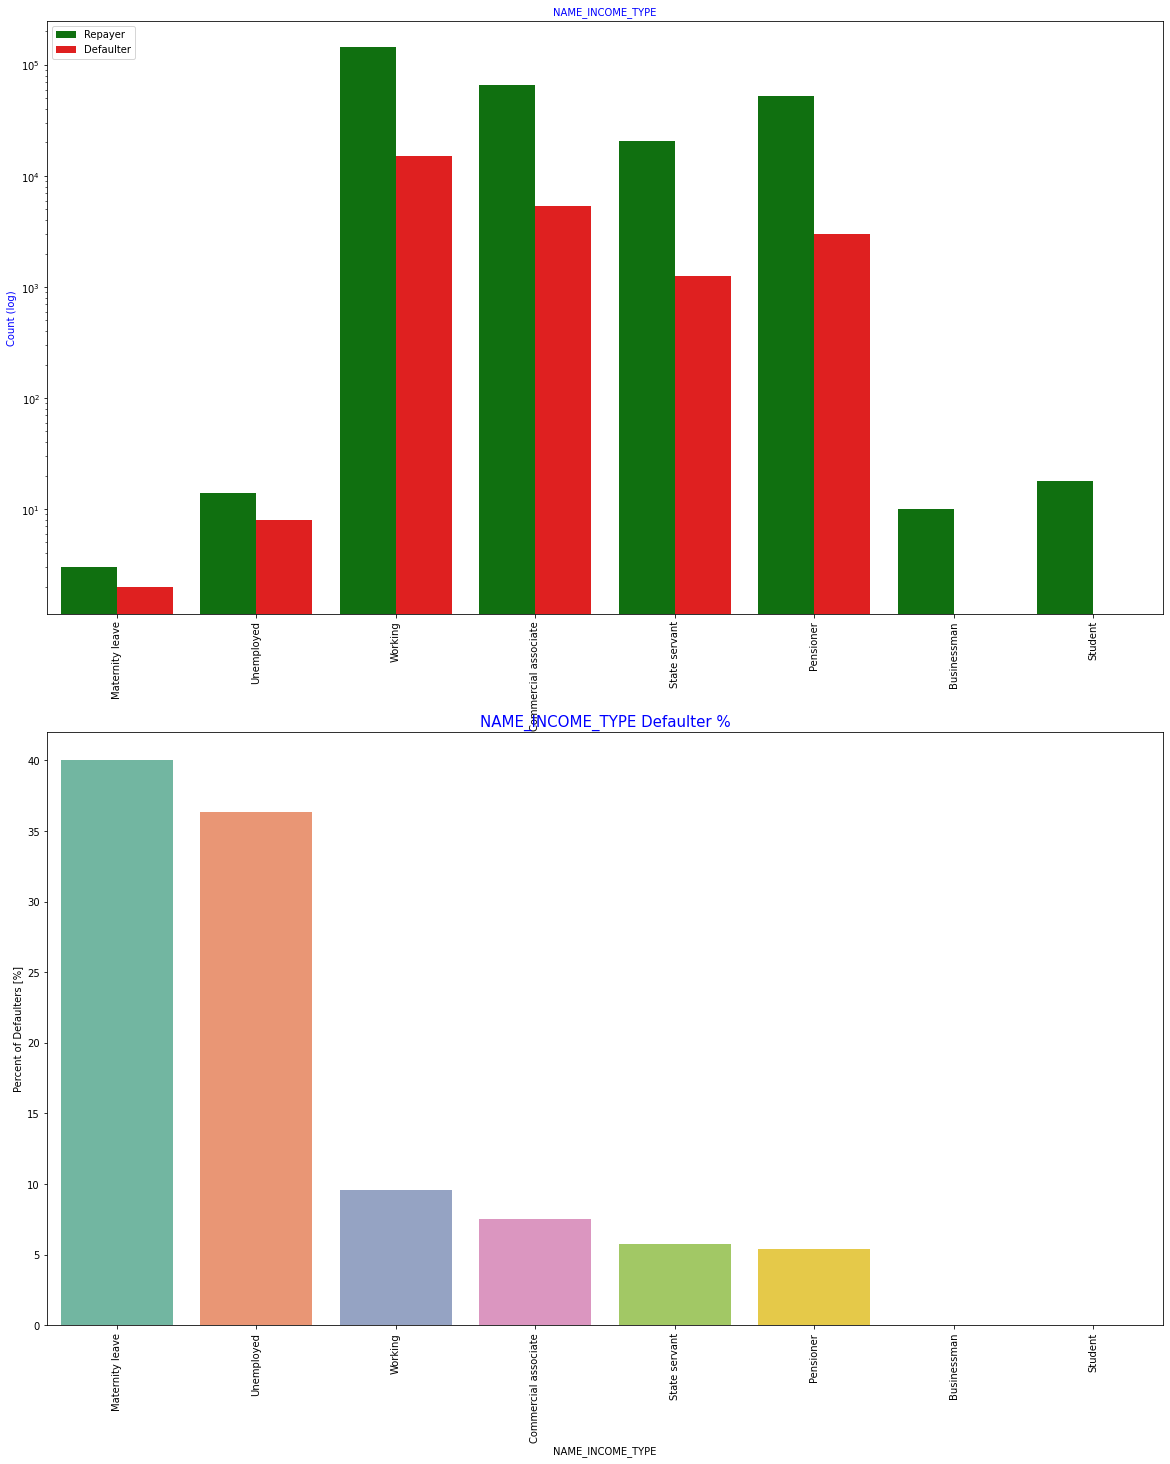

In [177]:
# Analyzing Income Type based on loan repayment status
univariate_categorical2("NAME_INCOME_TYPE",True,True,False)

##  Inferences:

#### Most of applicants for loans have income type as Working, followed by Commercial associate, Pensioner and State servant.
#### The applicants with the type of income Maternity leave have almost make 40% ratio of the defaulters, followed by Unemployed (37%). The rest of types of incomes are under the average of 10% for not returning loans.
#### Student and Businessmen, though less in numbers do not have any default record. Thus these two category are safest for providing loan. 

## REGION_RATING_CLIENT 

In [178]:
app_data.REGION_RATING_CLIENT.value_counts(normalize=True)*100

2    73.813294
3    15.716511
1    10.470195
Name: REGION_RATING_CLIENT, dtype: float64

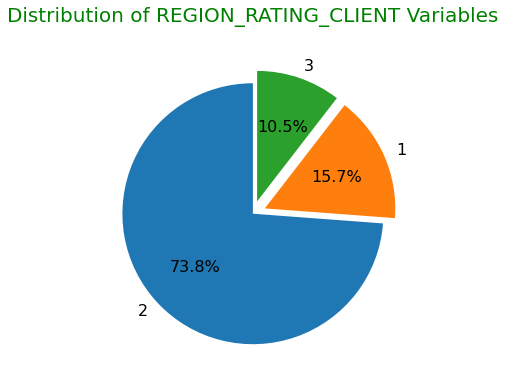

In [179]:
# Distribution based on Region Rating Type of Loan - 1 or 2 or 3
# Showing imbalance in a Pie Chart
lables = '2','1','3'
explode = (0, 0.1, 0.1)  # only "explode" the 23nd slice (i.e. 'Very good')
plt.figure(figsize = [6,6])

plt.pie(app_data["REGION_RATING_CLIENT"].value_counts(), explode=explode, labels=lables, autopct='%1.1f%%', 
        textprops={'fontsize': 16, 'fontweight' : 20, 'color' : 'Black'}, startangle=90)

# Adding and formatting title
plt.title("Distribution of REGION_RATING_CLIENT Variables\n", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.show()

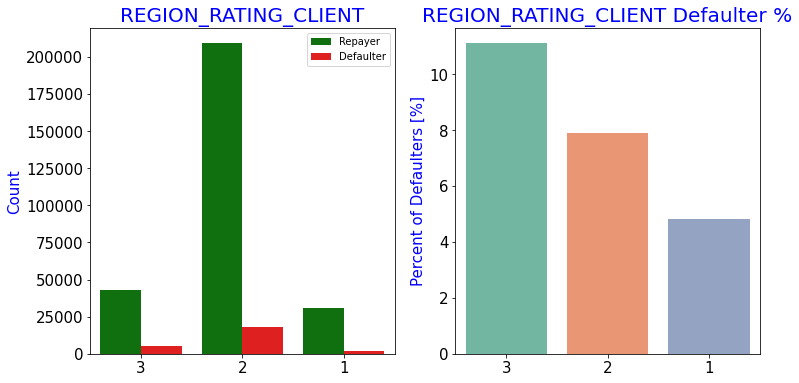

In [180]:
# Analyzing Region rating where applicant lives based on loan repayment status
univariate_categorical("REGION_RATING_CLIENT",False,False,True)

## Inferences:

#### Most of the applicants are living in Region_Rating 2 place.
Region Rating 3 has the highest default rate (11%) , fol1owed by 2( around 8%) and 1(around 5%)
#### Applicant living in Region_Rating 1 has the lowest probability of defaulting, thus safer for approving loans 

## OCCUPATION_TYPE

In [181]:
app_data.OCCUPATION_TYPE.value_counts(normalize=True)*100

Missing                  31.345545
Laborers                 17.946025
Sales staff              10.439301
Core staff                8.965533
Managers                  6.949670
Drivers                   6.049540
High skill tech staff     3.700681
Accountants               3.191105
Medicine staff            2.776161
Security staff            2.185613
Cooking staff             1.933589
Cleaning staff            1.513117
Private service staff     0.862408
Low-skill Laborers        0.680626
Waiters/barmen staff      0.438358
Secretaries               0.424375
Realty agents             0.244219
HR staff                  0.183083
IT staff                  0.171051
Name: OCCUPATION_TYPE, dtype: float64

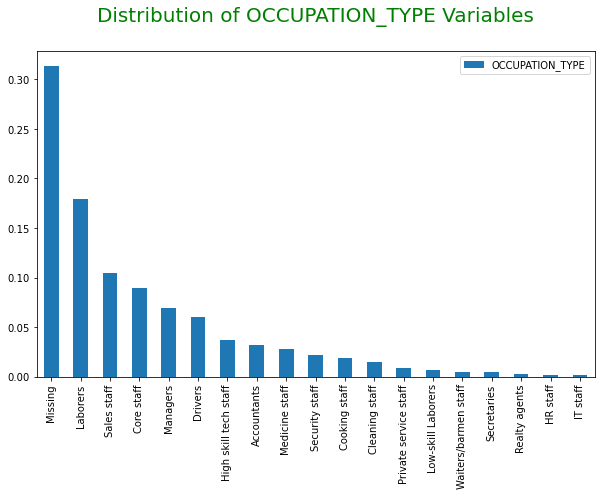

In [182]:
plt.figure(figsize = [10,6])
app_data.OCCUPATION_TYPE.value_counts(normalize= True).plot.bar()
plt.title("Distribution of OCCUPATION_TYPE Variables\n", fontdict={"fontsize":20, "fontweight":5, "color":"Green"})
plt.legend()
plt.show()

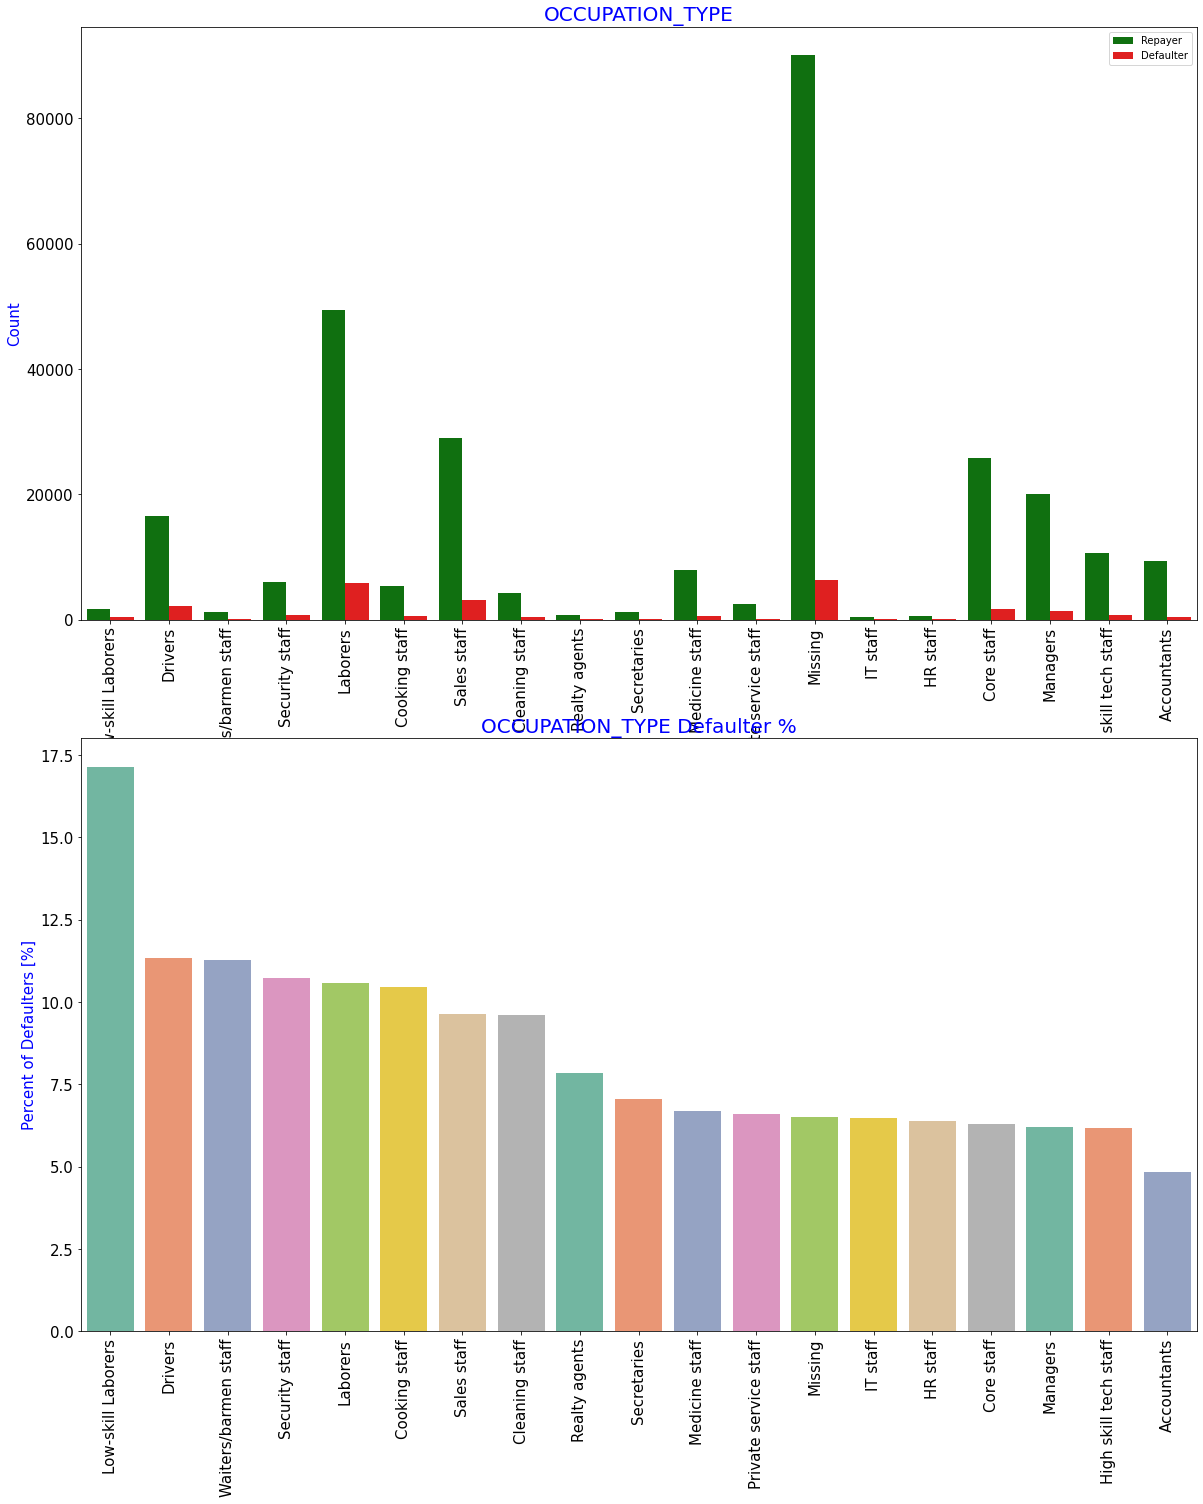

In [183]:
# Analyzing Occupation Type where applicant lives based on loan repayment status
univariate_categorical("OCCUPATION_TYPE",False,True,False)

## Inferences:

#### Most of the loans are taken by people whose Occupation is "Missing" in the dataset followed by Laborers, Sales staff. IT staff take the lowest amount of loans.
#### The category with highest percent of not repaid loans are Low-skill Laborers (above 17%), followed by Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff. 

## ORGANIZATION_TYPE 

In [184]:
app_data.ORGANIZATION_TYPE.value_counts(normalize=True)*100

Business Entity Type 3    22.110429
XNA                       18.007161
Self-employed             12.491260
Other                      5.425172
Medicine                   3.639870
Business Entity Type 2     3.431747
Government                 3.383294
School                     2.891929
Trade: type 7              2.546576
Kindergarten               2.237318
Construction               2.185613
Business Entity Type 1     1.945947
Transport: type 4          1.755384
Trade: type 3              1.135569
Industry: type 9           1.095245
Industry: type 3           1.065978
Security                   1.055897
Housing                    0.961917
Industry: type 11          0.879318
Military                   0.856555
Bank                       0.815255
Agriculture                0.798020
Police                     0.761274
Transport: type 2          0.716722
Postal                     0.701438
Security Ministries        0.641928
Trade: type 2              0.617864
Restaurant                 0

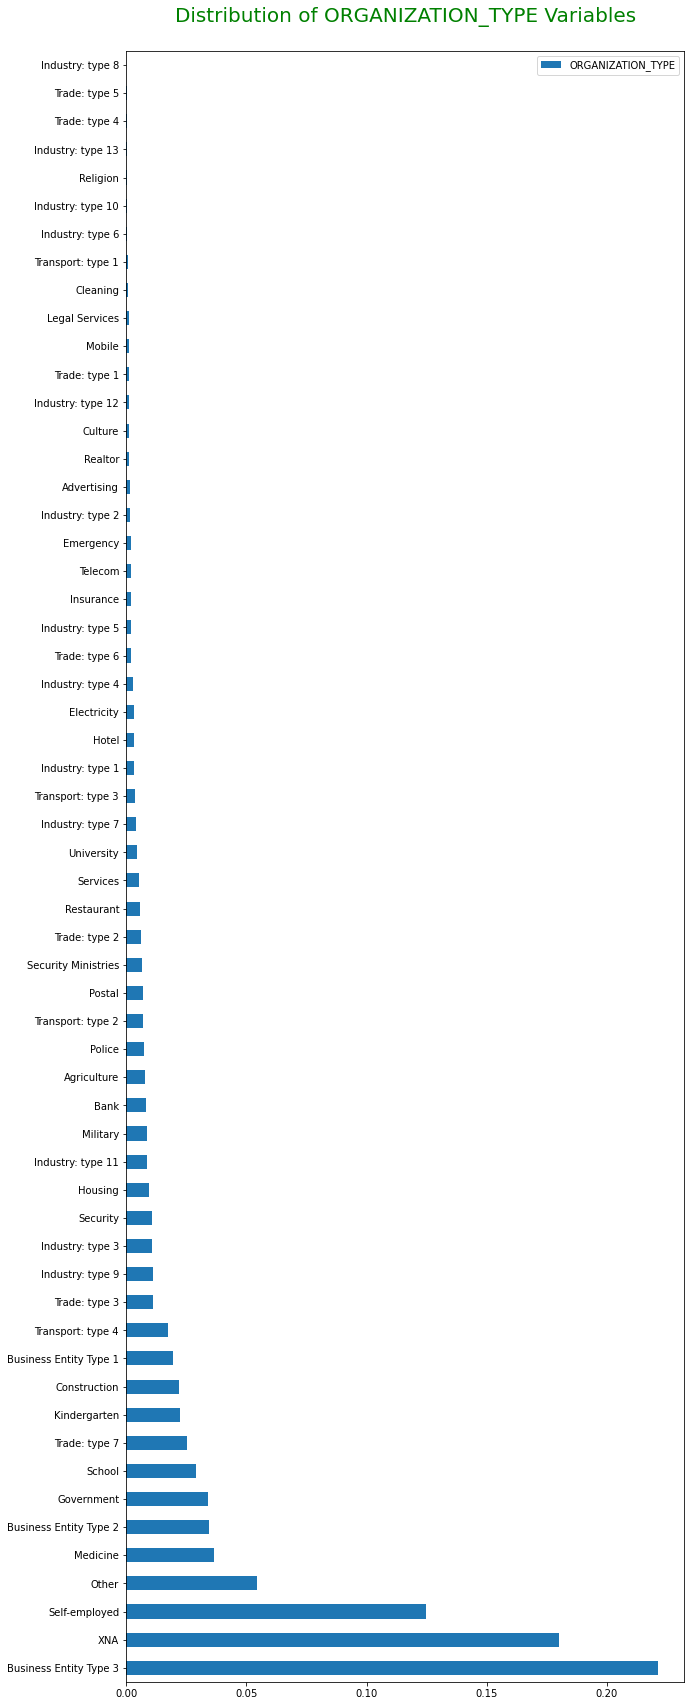

In [185]:
plt.figure(figsize = [10,30])
app_data.ORGANIZATION_TYPE.value_counts(normalize= True).plot.barh()
plt.title("Distribution of ORGANIZATION_TYPE Variables\n", fontdict={"fontsize":20, "fontweight":5, "color":"Green"})
plt.legend()
plt.show()

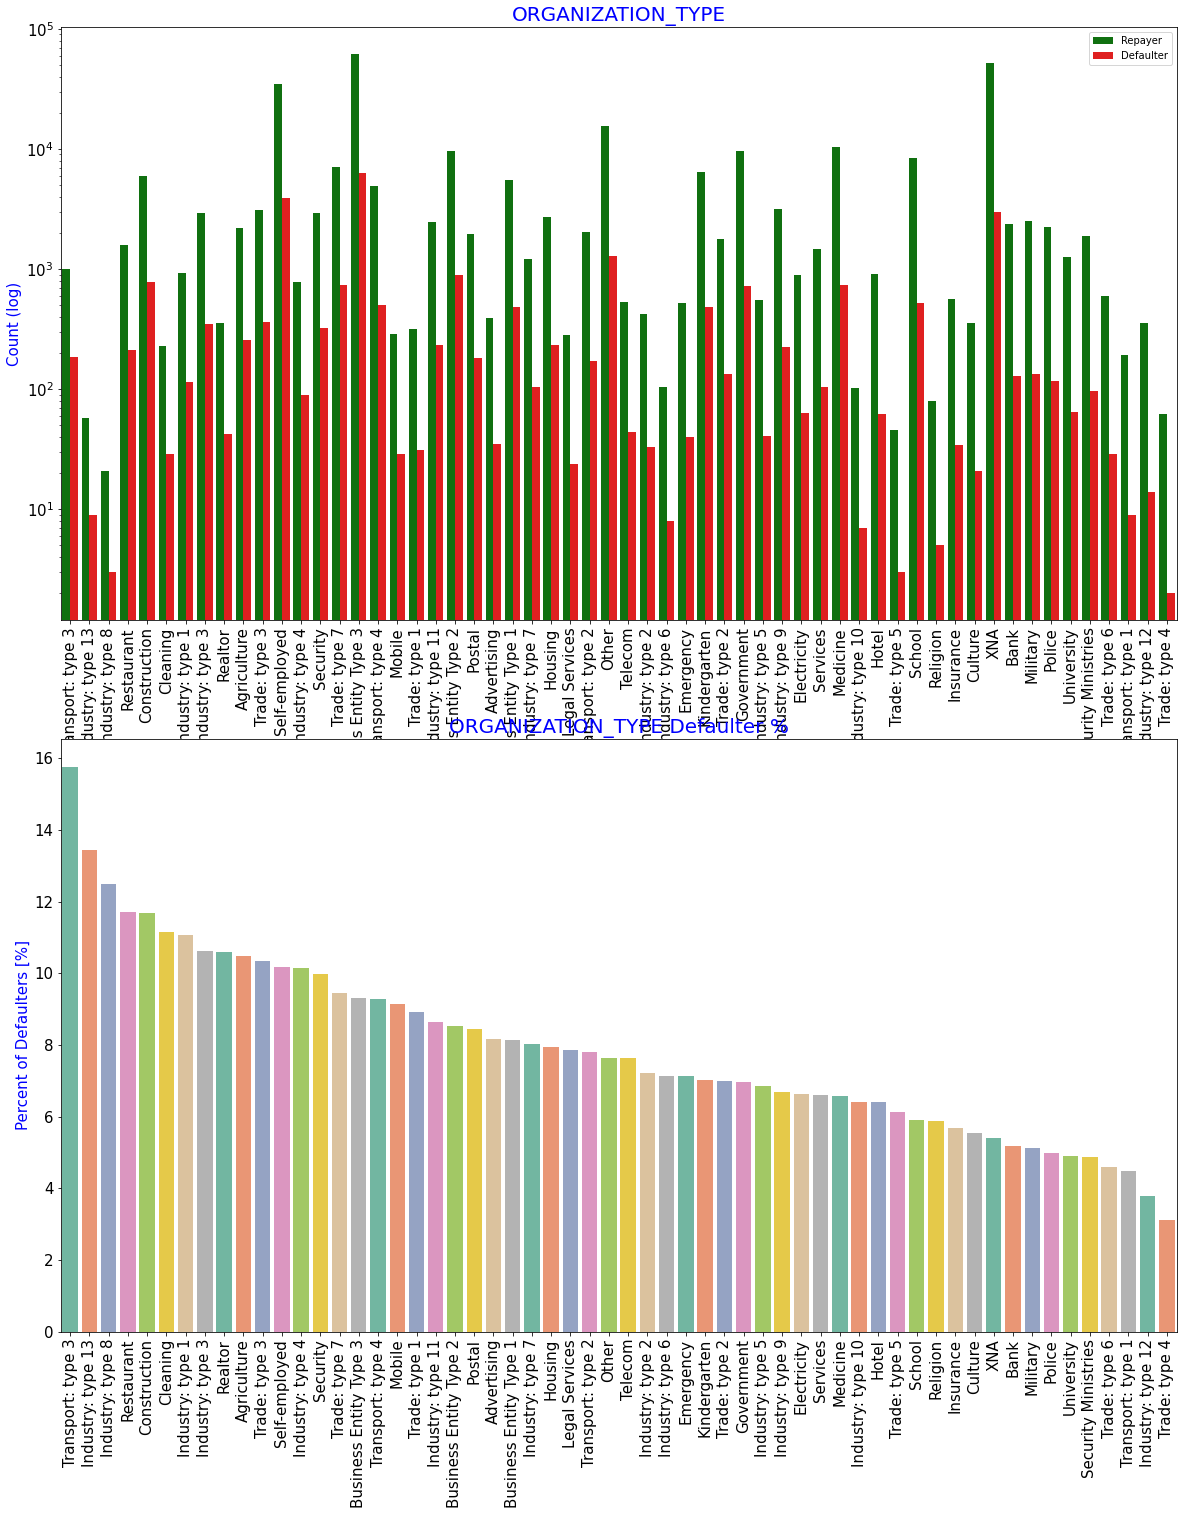

In [186]:
# Checking Loan repayment status based on Organization type
univariate_categorical("ORGANIZATION_TYPE",True,True,False)

## Inferences:
#### Most of the applications for loan are from people working in Business Entity Type 3 organization
#### Organizations with highest percent of loans not repaid are Transport: type 3 (around 16%), Industry: type 13 (13.5%), Industry: type 8 (around 12.5%) and Restaurant (less than 12%).
#### Self employed people have relative high defaulting rate (10%), and thus should be thoughly scrutized before being approved for loan or provide loan with higher interest rate to mitigate the risk of defaulting.
#### For a very high number of applications, Organization type information is unavailable(XNA)
#### It can be seen that following category of organization type has lesser defaulters thus safer for providing loans:
#### -> Trade Type 4
#### -> Industry type 12 

## FLAG_DOCUMENT_3
 

In [187]:
app_data.FLAG_DOCUMENT_3.value_counts(normalize=True)*100

1    71.002338
0    28.997662
Name: FLAG_DOCUMENT_3, dtype: float64

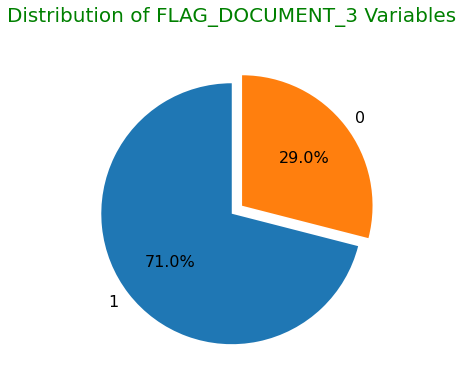

In [188]:
# Showing Flag Document in a Pie Chart
lables = '1','0'
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Very good')
plt.figure(figsize = [6,6])

plt.pie(app_data["FLAG_DOCUMENT_3"].value_counts(), explode=explode, labels=lables, autopct='%1.1f%%', 
        textprops={'fontsize': 16, 'fontweight' : 20, 'color' : 'Black'}, startangle=90)

# Adding and formatting title
plt.title("Distribution of FLAG_DOCUMENT_3 Variables\n", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.show()

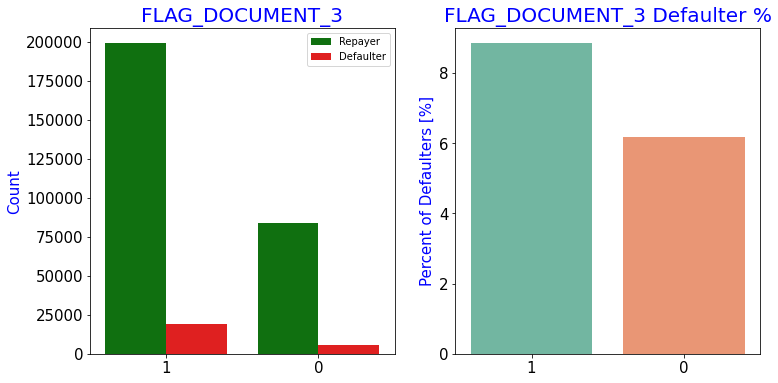

In [189]:
# Analyzing Flag_Doc_3 submission status based on loan repayment status
univariate_categorical("FLAG_DOCUMENT_3",False,False,True)

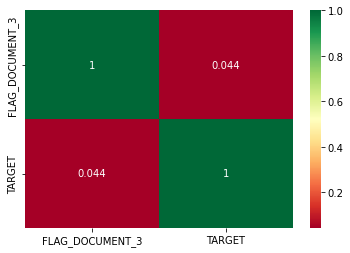

In [190]:
FLAG_DOCUMENT_3 = app_data[["FLAG_DOCUMENT_3","TARGET"]]
FLAG_DOCUMENT_3_corr = FLAG_DOCUMENT_3.corr()
ax = sns.heatmap(FLAG_DOCUMENT_3_corr,
            xticklabels=FLAG_DOCUMENT_3_corr.columns,
            yticklabels=FLAG_DOCUMENT_3_corr.columns,
            annot = True,
            cmap ="RdYlGn")

## Inferences:
#### There is no significant correlation between repayers and defaulters in terms of submitting document 3 as we see even if applicants have submitted the document, they have defaulted a slightly more (~9%) than who have not submitted the document (6%) 

## AGE_GROUP 

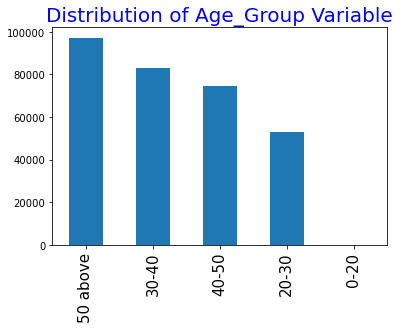

In [191]:
# Distribution of AGE_GROUP of the Clients from  the provided application dataset
create_bar_plot("AGE_GROUP",app_data)


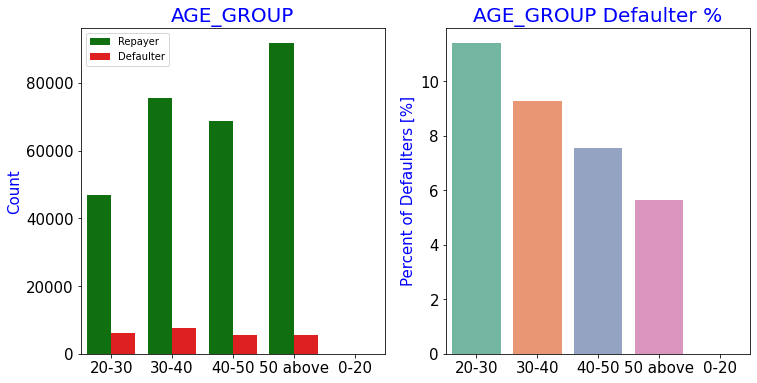

In [192]:
# Analyzing Age Group based on loan repayment status
univariate_categorical("AGE_GROUP",False,False,True)

##  Inferences:

#### People in the age group range 20-40 have higher probability of defaulting

#### People above age of 50 have low probability of defaulting

## YEARS_EMPLOYED_RANGE
 

In [193]:
app_data.YEARS_EMPLOYED_RANGE.value_counts(normalize=True)*100

0-5         49.604079
5-10        18.205202
60 Above    18.007161
10-20       10.620108
20-30        2.734536
30-40        0.772005
40-50        0.056909
50-60        0.000000
Name: YEARS_EMPLOYED_RANGE, dtype: float64

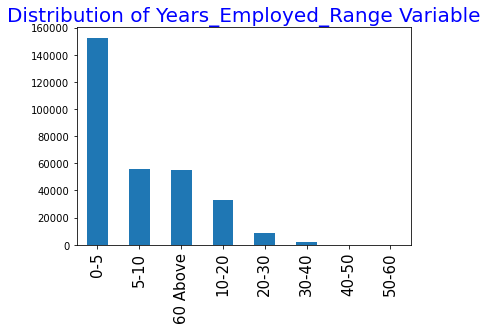

In [194]:
# Distribution of YEARS_EMPLOYED_RANGE of the Clients from  the provided application dataset
create_bar_plot("YEARS_EMPLOYED_RANGE",app_data)

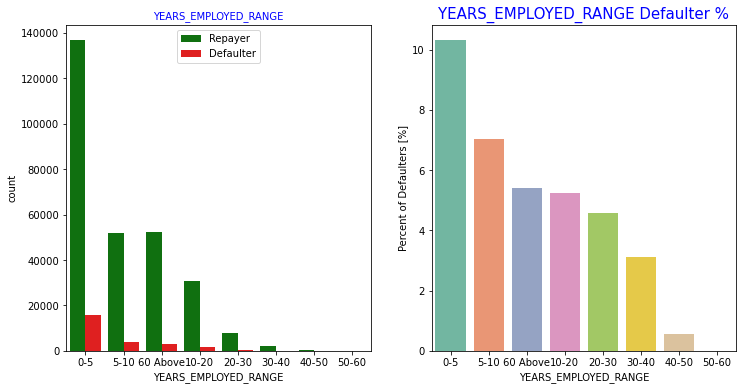

In [195]:
# Analyzing YEARS_EMPLOYED_RANGE based on loan repayment status
univariate_categorical2("YEARS_EMPLOYED_RANGE",False,False,True)

##  Inferences:
#### Majority of the applicants have been employed in between 0-5 years. The defaulting rating of this group is also the highest which is 10%
#### With increase of employment year, defaulting rate is gradually decreasing with people having 40+ year experience having less than 1% default rate

## AMT_CREDIT_RANGE 

In [196]:
app_data.AMT_CREDIT_RANGE.value_counts(normalize=True)*100

200k-300k    17.824728
1M Above     16.254703
500k-600k    11.131960
400k-500k    10.418489
100K-200K     9.801275
300k-400k     8.564897
600k-700k     7.820533
800k-900k     7.086576
700k-800k     6.241403
900k-1M       2.902986
0-100K        1.952450
Name: AMT_CREDIT_RANGE, dtype: float64

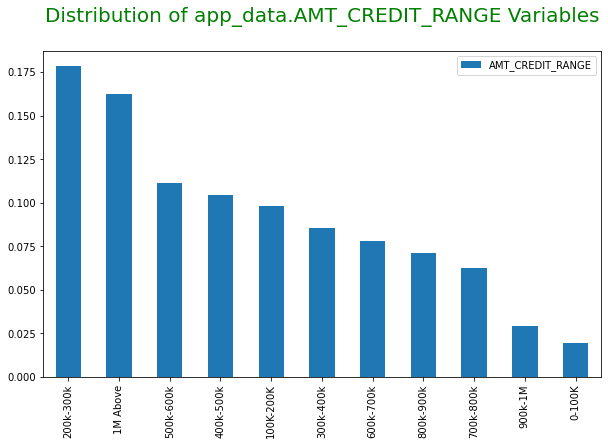

In [197]:
# Distribution of Loan Amount of the Clients from the provided application dataset
plt.figure(figsize = [10,6])
app_data.AMT_CREDIT_RANGE.value_counts(normalize= True).plot.bar()
plt.title("Distribution of app_data.AMT_CREDIT_RANGE Variables\n", fontdict={"fontsize":20, "fontweight":5, "color":"Green"})
plt.legend()
plt.show()

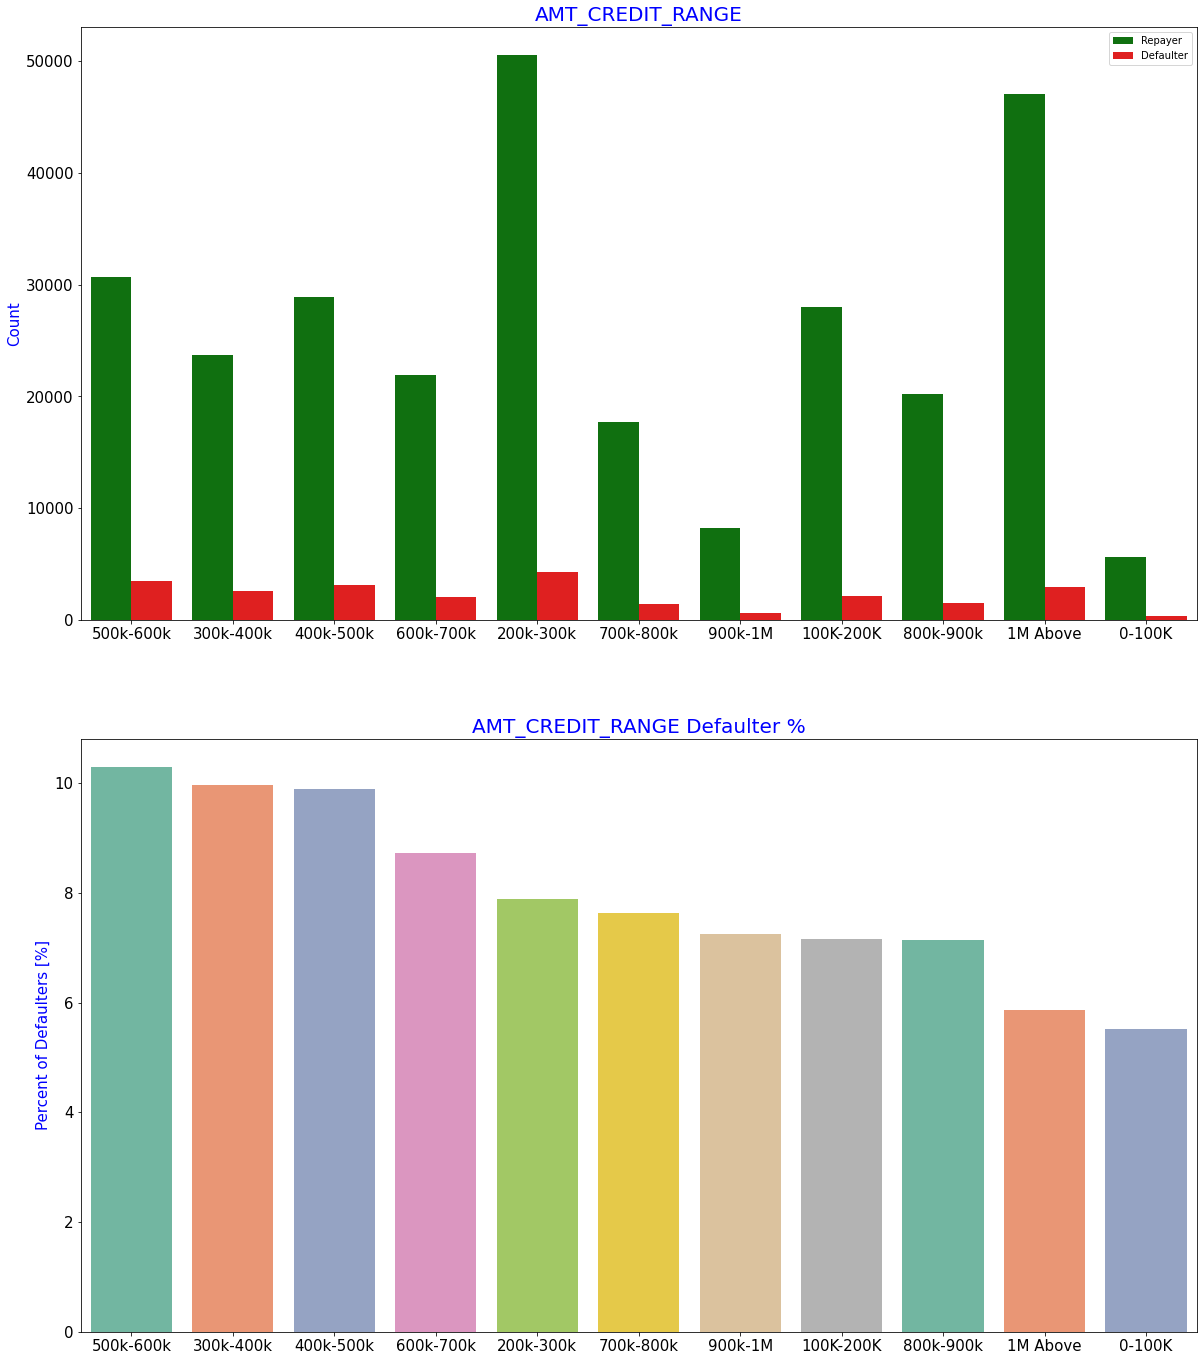

In [198]:
# Analyzing Amount_Credit based on loan repayment status
univariate_categorical("AMT_CREDIT_RANGE",False,False,False)

## Inferences:
#### Majority of the Loan amount is between 200-300K
#### More than 80% of the loan provided are for amount less than 900,000
#### People who get loan for 300-600k tend to default more than others.

## AMT_INCOME_RANGE

In [199]:
app_data.AMT_INCOME_RANGE.value_counts(normalize=True)*100

100K-200K    50.696723
200k-300k    21.194689
0-100K       20.714056
300k-400k     4.772512
400k-500k     1.743352
500k-600k     0.356085
600k-700k     0.282592
800k-900k     0.096907
1M Above      0.081298
700k-800k     0.052681
900k-1M       0.009105
Name: AMT_INCOME_RANGE, dtype: float64

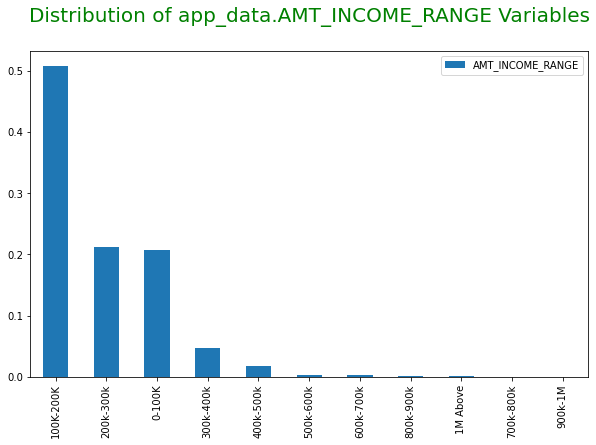

In [200]:
# Distribution of Income of the Clients from the provided application dataset
plt.figure(figsize = [10,6])
app_data.AMT_INCOME_RANGE.value_counts(normalize= True).plot.bar()
plt.title("Distribution of app_data.AMT_INCOME_RANGE Variables\n", fontdict={"fontsize":20, "fontweight":5, "color":"Green"})
plt.legend()
plt.show()

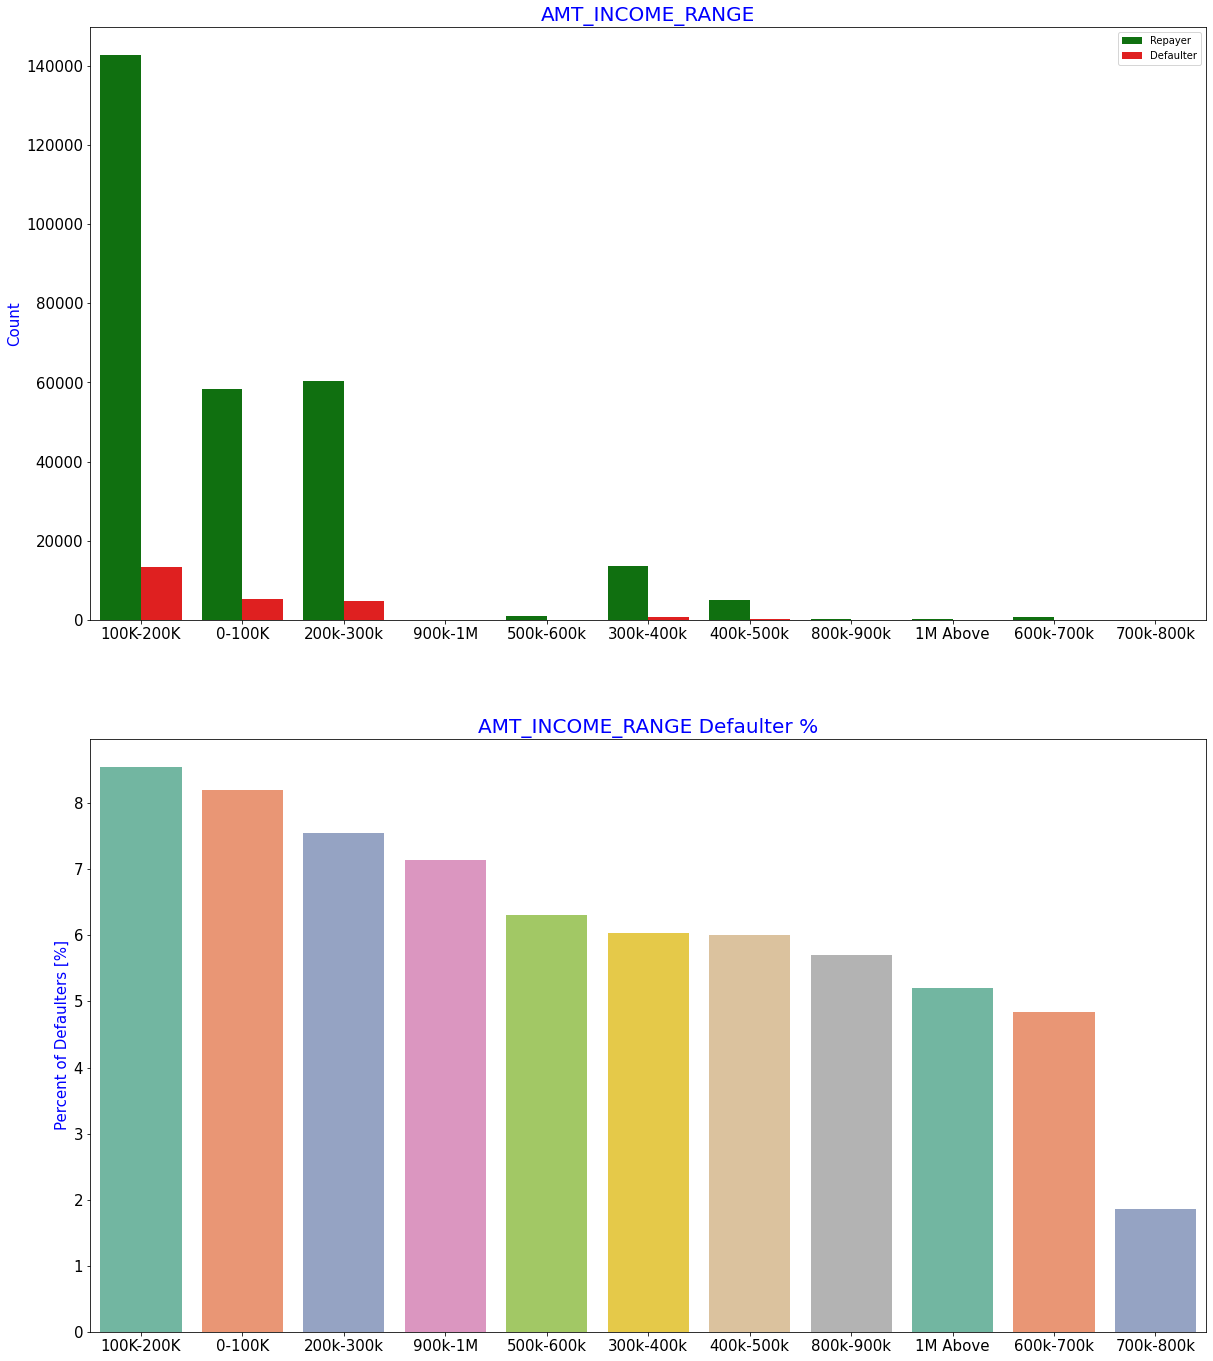

In [201]:
# Analyzing Amount_Income Range based on loan repayment status
univariate_categorical("AMT_INCOME_RANGE",False,False,False)

## Inferences:
#### Majority of the applicants have salary between 100-200K
#### Application with Income less than 300,000 has high probability of defaulting
#### Applicant with Income between 700-800k are less likely to default.

## CNT_CHILDREN 

In [202]:
app_data.CNT_CHILDREN.value_counts(normalize=True)*100

0     70.036844
1     19.875387
2      8.698551
3      1.208737
4      0.139507
5      0.027316
6      0.006829
7      0.002276
14     0.000976
8      0.000650
9      0.000650
12     0.000650
10     0.000650
19     0.000650
11     0.000325
Name: CNT_CHILDREN, dtype: float64

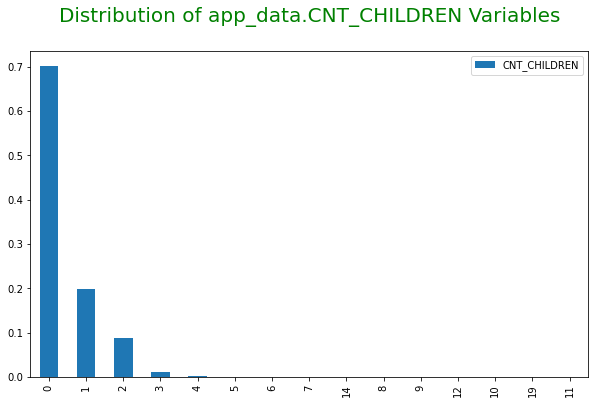

In [203]:
# Distribution of No. of Children of the Clients from the provided application dataset
plt.figure(figsize = [10,6])
app_data.CNT_CHILDREN.value_counts(normalize= True).plot.bar()
plt.title("Distribution of app_data.CNT_CHILDREN Variables\n", fontdict={"fontsize":20, "fontweight":5, "color":"Green"})
plt.legend()
plt.show()

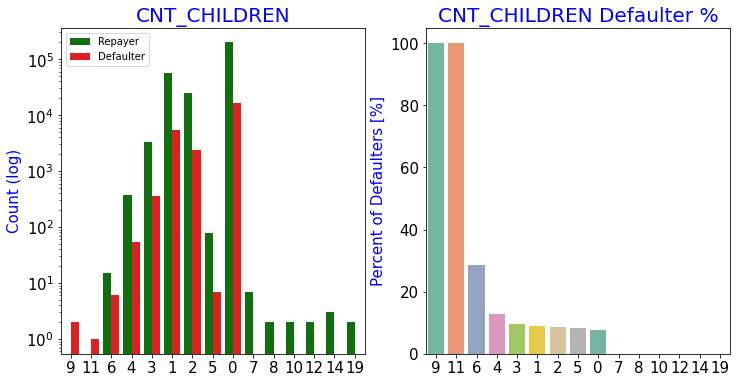

In [204]:
# Analyzing Number of children based on loan repayment status
univariate_categorical("CNT_CHILDREN",True)

## Inferences:
#### Most of the applicants do not have children. As applicants in this group are more the no. of defaulters are also more in this group
####  Very few clients have more than 3 children.
#### Client who have more than 4 children have a very high default rate with child count 9 and 11 showing 100% default rate 

## CNT_FAM_MEMBERS 

In [205]:
app_data.CNT_FAM_MEMBERS.value_counts(normalize=True)*100

2     51.497020
1     22.063276
3     17.105404
4      8.031257
5      1.131016
6      0.132678
7      0.026341
8      0.006504
9      0.001951
10     0.000976
14     0.000650
12     0.000650
20     0.000650
16     0.000650
13     0.000325
15     0.000325
11     0.000325
Name: CNT_FAM_MEMBERS, dtype: float64

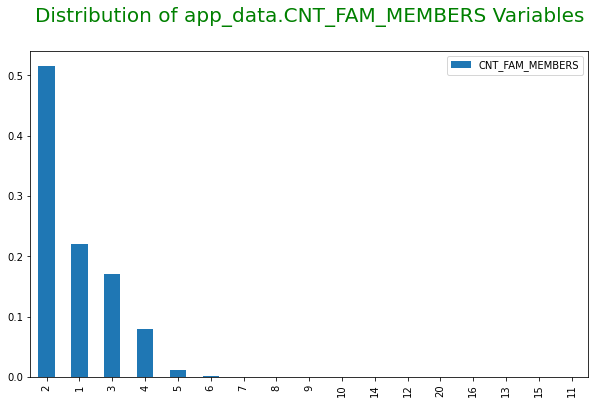

In [206]:
# Distribution of No. of family members of the Clients from the provided application dataset
plt.figure(figsize = [10,6])
app_data.CNT_FAM_MEMBERS.value_counts(normalize= True).plot.bar()
plt.title("Distribution of app_data.CNT_FAM_MEMBERS Variables\n", fontdict={"fontsize":20, "fontweight":5, "color":"Green"})
plt.legend()
plt.show()

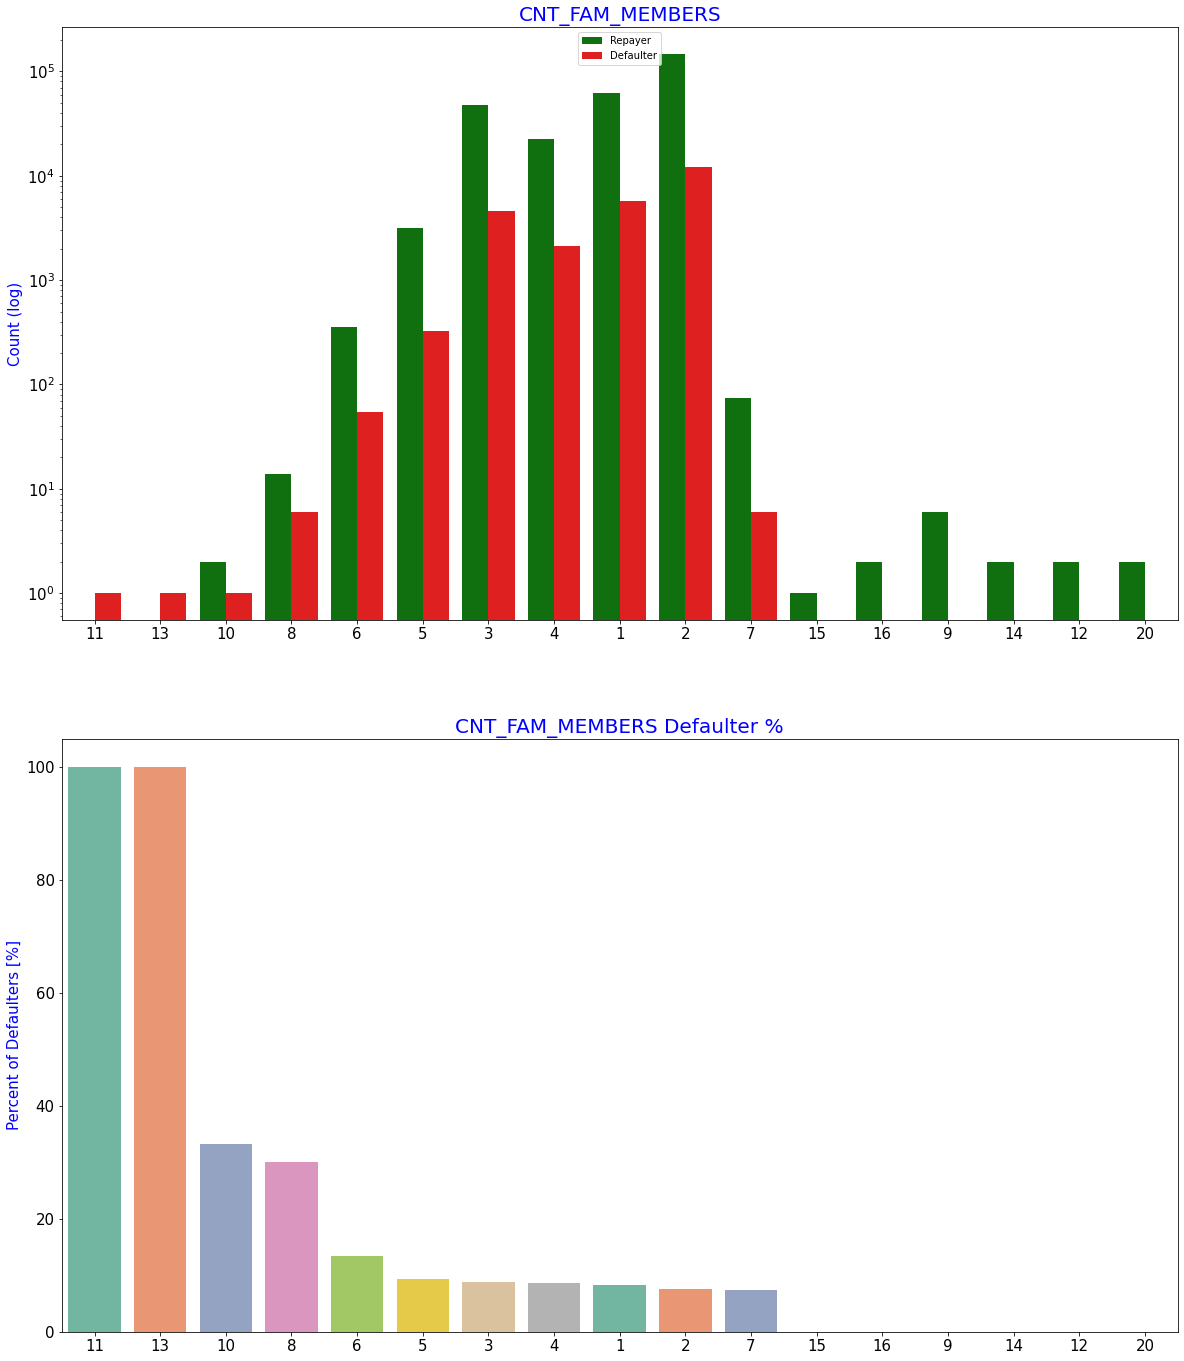

In [207]:
# Analyzing Number of family members based on loan repayment status
univariate_categorical("CNT_FAM_MEMBERS",True, False, False)

## Inferences:
#### Family member follows the same trend as children where having more family members increases the risk of defaulting 

# Categorical Bi/Multivariate Analysis
 

In [208]:
# Data view of NAME_INCOME_TYPE Vs AMT_INCOME_TOTAL
app_data.groupby("NAME_INCOME_TYPE")["AMT_INCOME_TOTAL"].describe()

,count,mean,std,min,25%,50%,75%,max
NAME_INCOME_TYPE,,,,,,,,
Businessman,10.0,6.525000,6.272260,1.8000,2.250,4.9500,8.43750,22.5000
Commercial associate,71617.0,2.029553,1.479742,0.2655,1.350,1.8000,2.25000,180.0009
Maternity leave,5.0,1.404000,1.268569,0.4950,0.675,0.9000,1.35000,3.6000
Pensioner,55362.0,1.364013,0.766503,0.2565,0.900,1.1700,1.66500,22.5000
State servant,21703.0,1.797380,1.008806,0.2700,1.125,1.5750,2.25000,31.5000
Student,18.0,1.705000,1.066447,0.8100,1.125,1.5750,1.78875,5.6250
Unemployed,22.0,1.105364,0.880551,0.2655,0.540,0.7875,1.35000,3.3750
Working,158774.0,1.631699,3.075777,0.2565,1.125,1.3500,2.02500,1170.0000


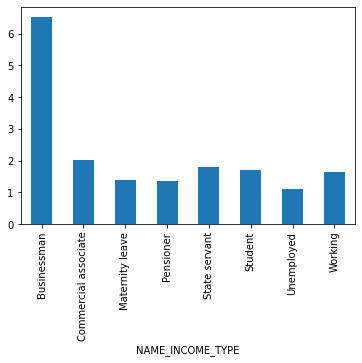

In [209]:
app_data.groupby(["NAME_INCOME_TYPE"])["AMT_INCOME_TOTAL"].mean().plot.bar()
plt.show()


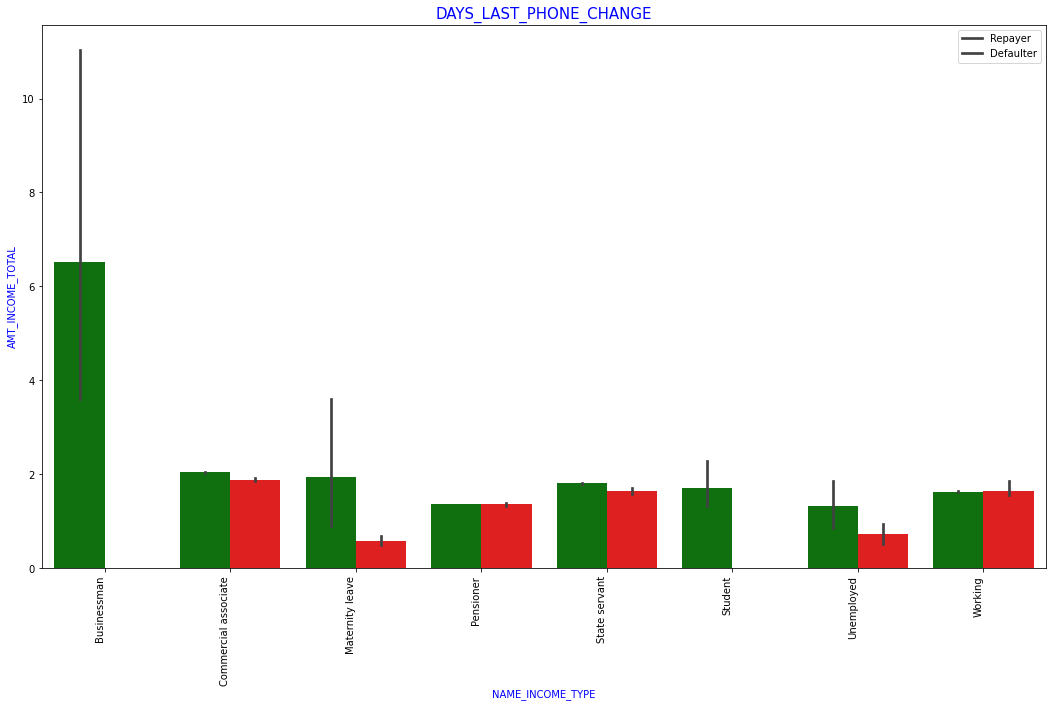

In [210]:
# Income type vs Income Amount Range
bivariate_bar("NAME_INCOME_TYPE","AMT_INCOME_TOTAL",app_data,"TARGET",(18,10))

##  Inferences:
#### It can be seen that business man's income is the highest and the estimated range with default 95% confidence level seem to indicate that the income of a business man could be in the range of slightly close to 4 lakhs and slightly above 10 lakhs

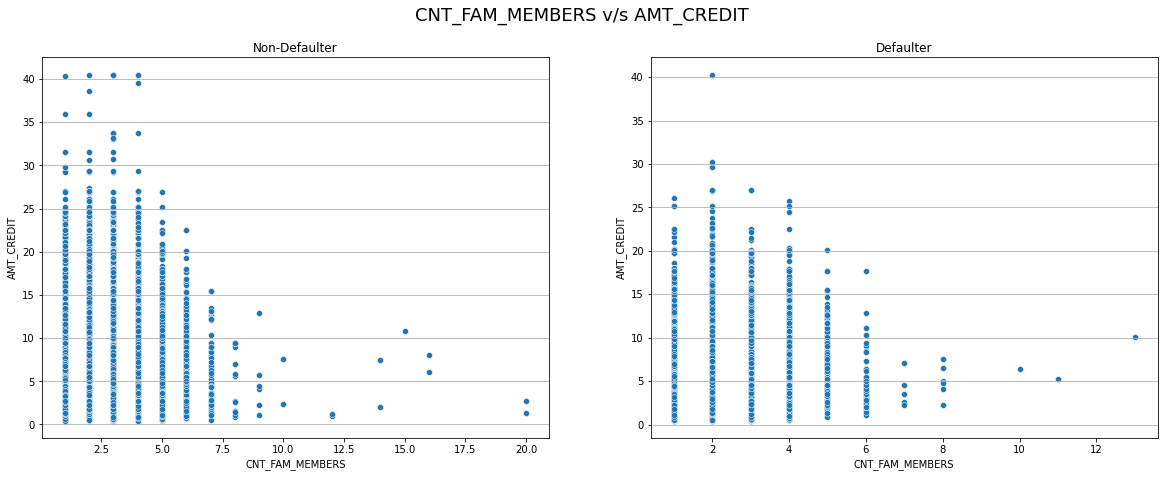

In [211]:
#Analysing CNT_FAM_MEMBERS and  AMT_CREDIT and its effect on loan repayment status
plt.figure(figsize=[20,7])
plt.suptitle("CNT_FAM_MEMBERS v/s AMT_CREDIT",fontsize=18)
plt.subplot(1,2,1)
sns.scatterplot(data=target0,x='CNT_FAM_MEMBERS',y='AMT_CREDIT')
plt.title("Non-Defaulter")
plt.grid(axis='y')
plt.subplot(1,2,2)
sns.scatterplot(data=target1,x='CNT_FAM_MEMBERS',y='AMT_CREDIT')
plt.grid(axis='y')
plt.title("Defaulter")
plt.show()

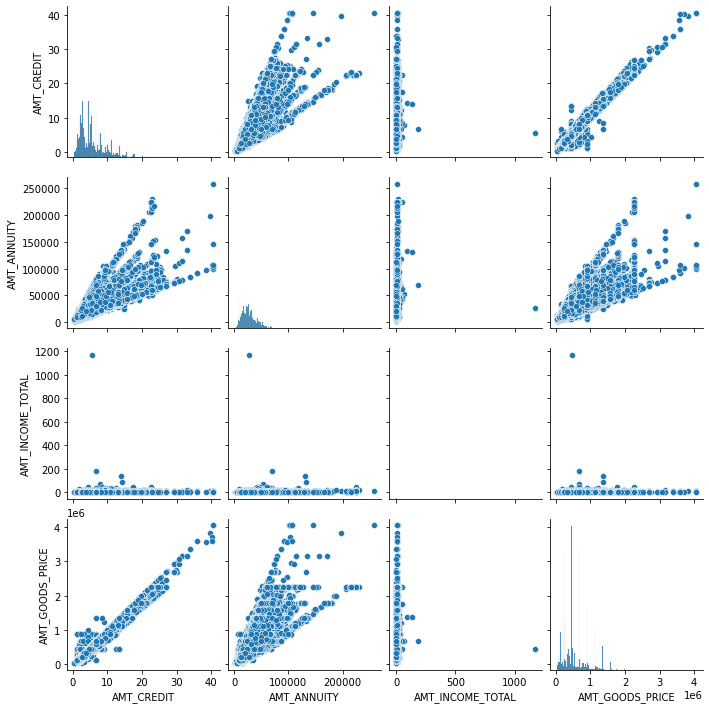

In [212]:
#plot the pair plot of salary, balance and age in inp1 dataframe.
sns.pairplot(data=app_data, vars=['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE'])
plt.show()

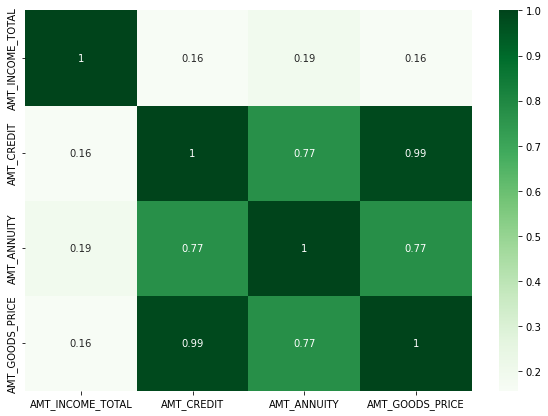

In [213]:
#Correlation between variables
plt.figure(figsize=[10,7])
sns.heatmap(app_data[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']].corr(), annot=True, cmap ="Greens")
plt.show()

## Insights:

#### Very high correlation between AMT_CREDIT and AMT_GOODS_PRICE - Applicants owning goods of high value can take loans of higher amounts.

## Numeric Variables Analysis

#### Bifurcating the application_data dataframe based on Target value 0 and 1 for correlation and other analysis 

In [214]:
app_data.columns


Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [215]:
# Bifurcating the application_data dataframe based on Target value 0 and 1 for correlation and other analysis
cols_for_correlation = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
                        'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
                        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                        'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                        'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
                        'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
                        'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
                        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
                        'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 
                        'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


Repayer_df = app_data.loc[app_data['TARGET']==0, cols_for_correlation] # Repayers
Defaulter_df = app_data.loc[app_data['TARGET']==1, cols_for_correlation] # Defaulters

In [216]:
# Getting the top 10 correlation for the Repayers data
corr_repayer = Repayer_df.corr()
corr_repayer = corr_repayer.where(np.triu(np.ones(corr_repayer.shape),k=1).astype(np.bool))
corr_df_repayer = corr_repayer.unstack().reset_index()
corr_df_repayer.columns =['VAR1','VAR2','Correlation']
corr_df_repayer.dropna(subset = ["Correlation"], inplace = True)
corr_df_repayer["Correlation"]=corr_df_repayer["Correlation"].abs() 
corr_df_repayer.sort_values(by='Correlation', ascending=False, inplace=True) 
corr_df_repayer.head(10)

,VAR1,VAR2,Correlation
94,AMT_GOODS_PRICE,AMT_CREDIT,0.987022
230,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878571
95,AMT_GOODS_PRICE,AMT_ANNUITY,0.776421
71,AMT_ANNUITY,AMT_CREDIT,0.771297
167,DAYS_EMPLOYED,DAYS_BIRTH,0.626114
70,AMT_ANNUITY,AMT_INCOME_TOTAL,0.418948
93,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.349426
47,AMT_CREDIT,AMT_INCOME_TOTAL,0.342799
138,DAYS_BIRTH,CNT_CHILDREN,0.336966
190,DAYS_REGISTRATION,DAYS_BIRTH,0.333151


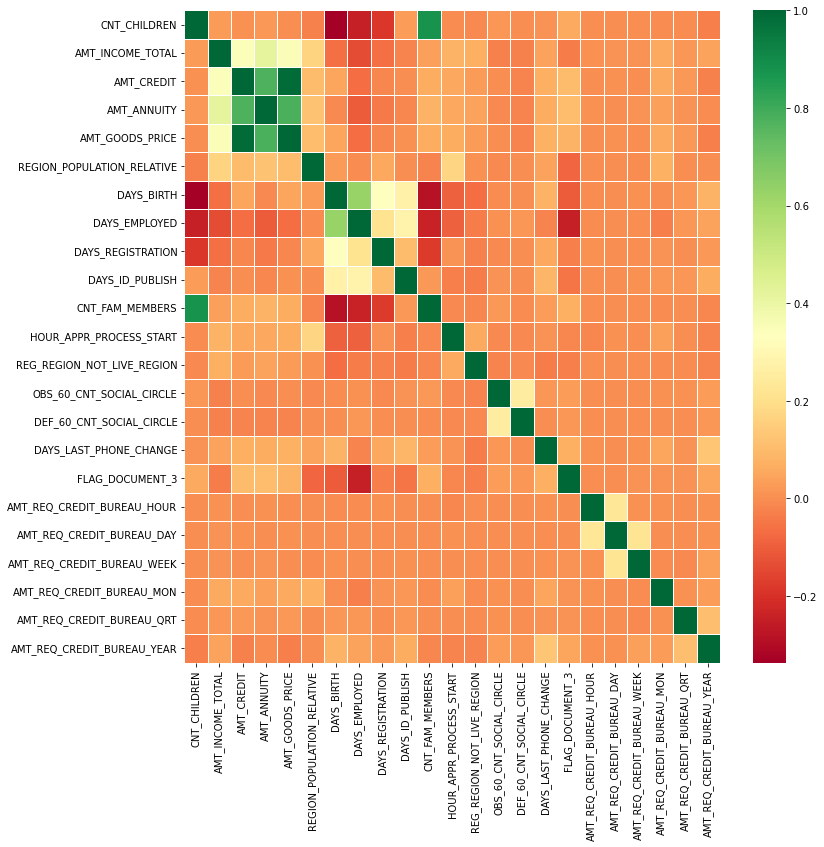

In [217]:
fig = plt.figure(figsize=(12,12))
sid = sns.heatmap(Repayer_df.corr(), cmap="RdYlGn",annot=False,linewidth =1)

## Inferences:
#### Correlating factors amongst repayers:
#### Credit amount is highly correlated with

##### amount of goods price
##### loan annuity
##### total income

#### We can also see that repayers have high correlation in number of days employed.

## Inferences:

#### Correlating factors amongst repayers:
#### Credit amount is highly correlated with

##### amount of goods price
##### loan annuity
##### total income
##### We can also see that repayers have high correlation in number of days employed. 

In [218]:
# Getting the top 10 correlation for the Defaulter data
corr_Defaulter = Defaulter_df.corr()
corr_Defaulter = corr_Defaulter.where(np.triu(np.ones(corr_Defaulter.shape),k=1).astype(np.bool))
corr_df_Defaulter = corr_Defaulter.unstack().reset_index()
corr_df_Defaulter.columns =['VAR1','VAR2','Correlation']
corr_df_Defaulter.dropna(subset = ["Correlation"], inplace = True)
corr_df_Defaulter["Correlation"]=corr_df_Defaulter["Correlation"].abs()
corr_df_Defaulter.sort_values(by='Correlation', ascending=False, inplace=True)
corr_df_Defaulter.head(10)

,VAR1,VAR2,Correlation
94,AMT_GOODS_PRICE,AMT_CREDIT,0.982783
230,CNT_FAM_MEMBERS,CNT_CHILDREN,0.885484
95,AMT_GOODS_PRICE,AMT_ANNUITY,0.752295
71,AMT_ANNUITY,AMT_CREDIT,0.752195
167,DAYS_EMPLOYED,DAYS_BIRTH,0.582185
190,DAYS_REGISTRATION,DAYS_BIRTH,0.289114
375,FLAG_DOCUMENT_3,DAYS_EMPLOYED,0.272169
335,DEF_60_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,0.264357
138,DAYS_BIRTH,CNT_CHILDREN,0.259109
213,DAYS_ID_PUBLISH,DAYS_BIRTH,0.252863


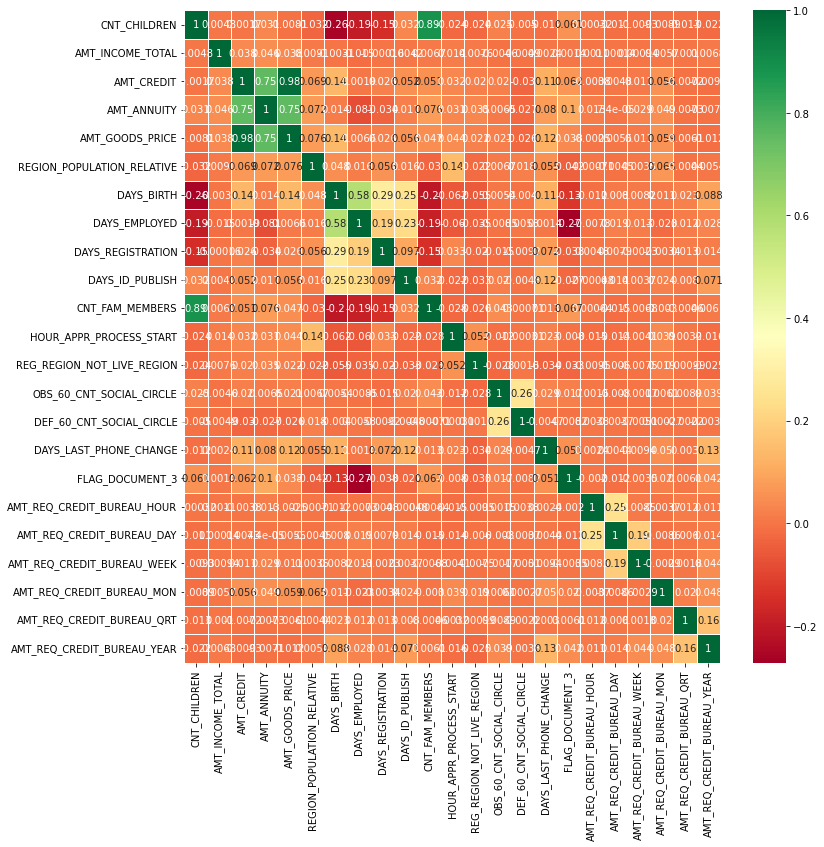

In [219]:
fig = plt.figure(figsize=(12,12))
sid = sns.heatmap(Defaulter_df.corr(), cmap="RdYlGn",annot=True,linewidth =1)

## Inferences:
#### Credit amount is highly correlated with amount of goods price which is same as repayers.
#### But the loan annuity correlation with credit amount has slightly reduced in defaulters(0.75) when compared to repayers(0.77)
#### We can also see that repayers have high correlation in number of days employed(0.62) when compared to defaulters(0.58).
#### There is a severe drop in the correlation between total income of the client and the credit amount(0.038) amongst defaulters whereas it is 0.342 among repayers.
#### Days_birth and number of children correlation has reduced to 0.259 in defaulters when compared to 0.337 in repayers.
#### There is a slight increase in defaulted to observed count in social circle among defaulters(0.264) when compared to repayers(0.254)

## Numerical Univariate Analysis

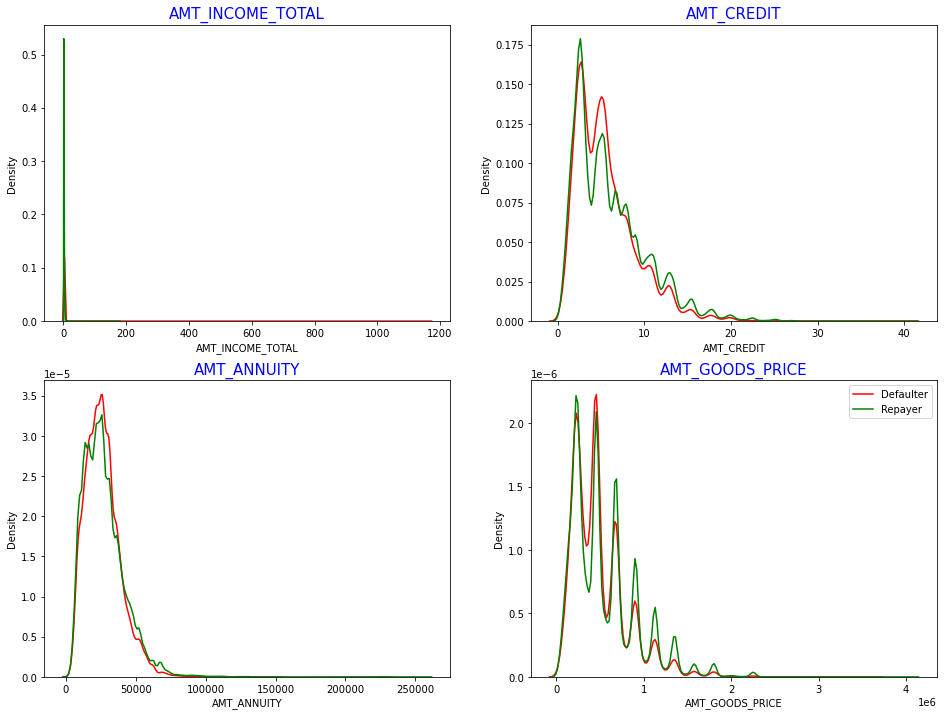

In [220]:
# Plotting the numerical columns related to amount as distribution plot to see density
amount = app_data[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']]

fig = plt.figure(figsize=(16,12))

for i in enumerate(amount):
    plt.subplot(2,2,i[0]+1)
    sns.distplot(Defaulter_df[i[1]], hist=False, color='r',label ="Defaulter")
    sns.distplot(Repayer_df[i[1]], hist=False, color='g', label ="Repayer")
    plt.title(i[1], fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    
plt.legend()

plt.show() 

##  Inferences:
#### Most no of loans are given for goods price below 10 lacs
#### Most people pay annuity below 50000 for the credit loan
#### Credit amount of the loan is mostly less then 10 lacs
#### The re-payers and defaulters distribution overlap in all the plots and hence we cannot use any of these variables in isolation to make a decision

## Numerical Bivariate Analysis

<Figure size 1080x432 with 0 Axes>

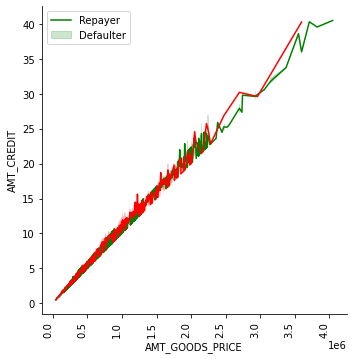

In [221]:
# Checking the relationship between Goods price and credit and comparing with loan repayment staus
bivariate_rel('AMT_GOODS_PRICE','AMT_CREDIT',app_data,"TARGET", "line", ['g','r'], False,(15,6))
plt.show()

## Inferences: When the credit amount goes beyond 3M, there is an increase in defaulters.

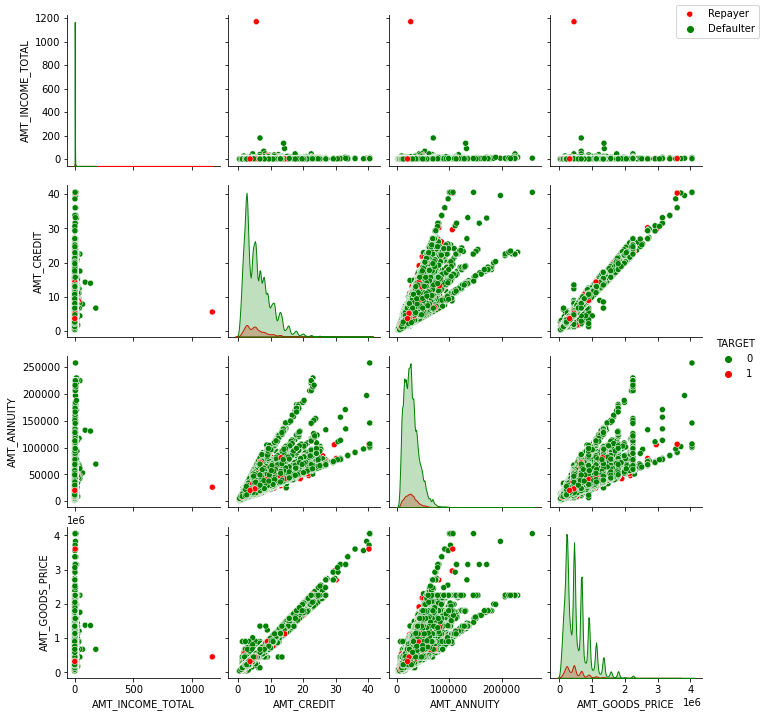

In [222]:
# Plotting pairplot between amount variable to draw reference against loan repayment status
amount = app_data[[ 'AMT_INCOME_TOTAL','AMT_CREDIT',
                         'AMT_ANNUITY', 'AMT_GOODS_PRICE','TARGET']]
amount = amount[(amount["AMT_GOODS_PRICE"].notnull()) & (amount["AMT_ANNUITY"].notnull())]
ax= sns.pairplot(amount,hue="TARGET",palette=["g","r"])
ax.fig.legend(labels=['Repayer','Defaulter'])
plt.show()

## Inferences:
#### When amt_annuity >15000 amt_goods_price> 3M, there is a lesser chance of defaulters
#### AMT_CREDIT and AMT_GOODS_PRICE are highly correlated as based on the scatterplot where most of the data are consolidated in form of a line
#### There are very less defaulters for AMT_CREDIT >3M
#### Inferences related to distribution plot has been already mentioned in previous distplot graphs inferences section 

# Merged Dataframes Analysis

In [223]:
#merge both the dataframe on SK_ID_CURR with Inner Joins
merged_sid = pd.merge(app_data, pre_data, how='inner', on='SK_ID_CURR')
merged_sid.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,AGE,AGE_GROUP,YEARS_EMPLOYED,YEARS_EMPLOYED_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_DECISION_GROUP
0,100002,1,Cash loans,M,N,Y,0,2.025,4.065975,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,200k-300k,400k-500k,25,20-30,1,0-5,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,800-1600
1,100003,0,Cash loans,F,N,N,0,2.700,12.935025,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,200k-300k,1M Above,45,40-50,3,0-5,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,XNA,Approved,746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,800-1600
2,100003,0,Cash loans,F,N,N,0,2.700,12.935025,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,200k-300k,1M Above,45,40-50,3,0-5,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17,Y,1,XAP,Approved,828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,1600-2000
3,100003,0,Cash loans,F,N,N,0,2.700,12.935025,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,200k-300k,1M Above,45,40-50,3,0-5,2396755

In [225]:
#Checking the details of the merged dataframe
merged_sid.shape

(1413701, 105)

In [227]:
# checking the columns and column types of the dataframe
merged_sid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Columns: 105 entries, SK_ID_CURR to DAYS_DECISION_GROUP
dtypes: category(39), float64(24), int64(42)
memory usage: 775.2 MB


In [228]:
# Checking merged dataframe numerical columns statistics
merged_sid.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED,SK_ID_PREV,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,HOUR_APPR_PROCESS_START_y,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1413701.0,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413700e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06
mean,2.784813e+05,8.655296e-02,4.048933e-01,1.733160e+00,5.875537e+00,2.701688e+04,5.276522e+05,2.074985e-02,1.632105e+04,7.266347e+04,5.003233e+03,3.034563e+03,1.0,8.064393e-01,1.822585e-01,9.992452e-01,2.828752e-01,7.242904e-02,2.150501e+00,1.198433e+01,1.207327e-02,5.114978e-01,4.974956e-01,1.540740e+00,1.537008e-01,1.522906e+00,1.078021e-01,1.084701e+03,7.073632e-05,7.385600e-01,7.639522e-05,1.369597e-02,8.942273e-02,2.129163e-04,7.442521e-02,3.182427e-03,5.588169e-05,1.702623e-03,1.414726e-06,1.783970e-03,1.428874e-03,6.571404e-04,6.006221e-03,1.421800e-04,4.196078e-03,3.989528e-04,3.671215e-04,2.242341e-04,5.484894e-03,6.028149e-03,3.410198e-02,2.664913e-01,3.196935e-01,2.575495e+00,4.421384e+01,1.985500e+02,1.922744e+06,1.484032e+04,1.752436e+05,1.963541e+05,1.854396e+05,1.247893e+01,9.964321e-01,8.803670e+02,3.149878e+02,1.517141e+01
std,1.028118e+05,2.811789e-01,7.173454e-01,1.985734e+00,3.849173e+00,1.395072e+04,3.531028e+05,1.334702e-02,4.344557e+03,1.433374e+05,3.551051e+03,1.507376e+03,0.0,3.950887e-01,3.860576e-01,2.746247e-02,4.503965e-01,2.591971e-01,9.006787e-01,3.232181e+00,1.092132e-01,1.910056e-01,1.797586e-01,2.528944e+00,4.654353e-01,2.507192e+00,3.786711e-01,7.999369e+02,8.410194e-03,4.394192e-01,8.740105e-03,1.162256e-01,2.853530e-01,1.459010e-02,2.624617e-01,5.632319e-02,7.475199e-03,4.122773e-02,1.189422e-03,4.219939e-02,3.777344e-02,2.562633e-02,7.726675e-02,1.192308e-02,6.464112e-02,1.996983e-02,1.915690e-02,1.497278e-02,7.702591e-02,1.001966e-01,2.012902e-01,9.268428e-01,8.781444e-01,2.268756e+00,1.190217e+01,3.926378e+02,5.327153e+05,1.316370e+04,2.936222e+05,3.194813e+05,2.881244e+05,3.331474e+00,5.962560e-02,7.835402e+02,7.695082e+03,1.299505e+01
min,1.000020e+05,0.000000e+00,0.000000e+00,2.565000e-01,4.500000e-01,1.615500e+03,4.050000e+04,2.900000e-04,7.489000e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,8.173617e-0

In [229]:
# Bifurcating the application_data dataframe based on Target value 0 and 1 for correlation and other analysis

T0 = merged_sid[merged_sid['TARGET']==0] # Repayers
T1 = merged_sid[merged_sid['TARGET']==1] # Defaulters

## Plotting Contract Status vs purpose of the loan:

 

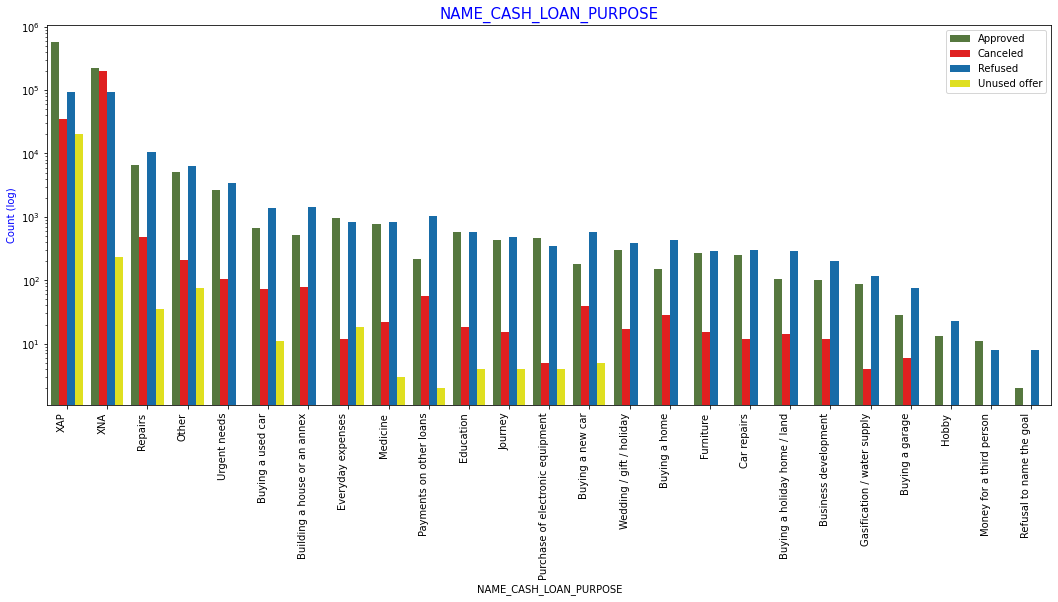

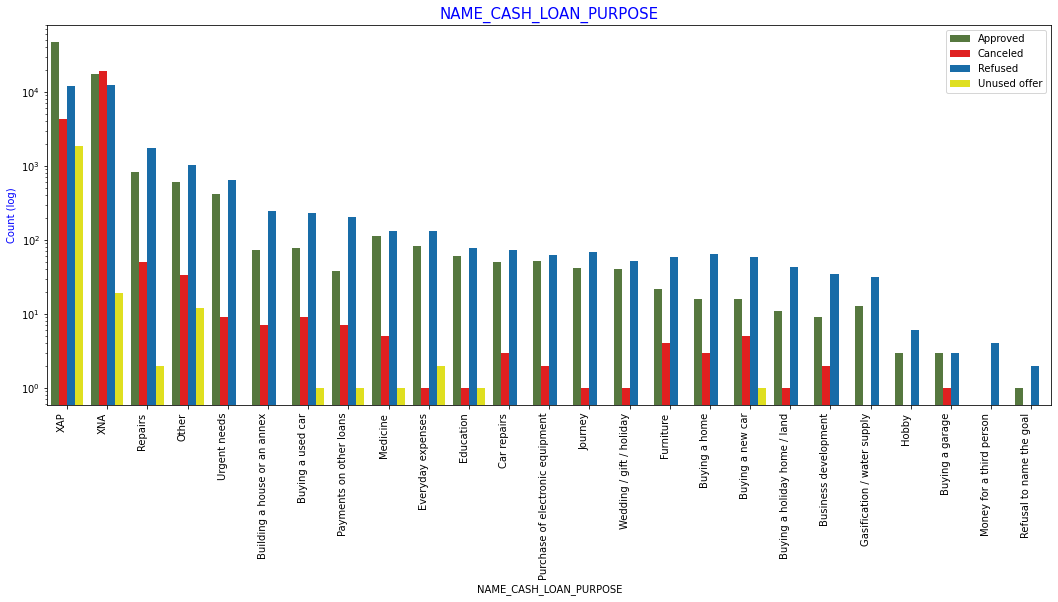

In [230]:
univariate_merged("NAME_CASH_LOAN_PURPOSE",T0,"NAME_CONTRACT_STATUS",["#548235","#FF0000","#0070C0","#FFFF00"],True,(18,7))

univariate_merged("NAME_CASH_LOAN_PURPOSE",T1,"NAME_CONTRACT_STATUS",["#548235","#FF0000","#0070C0","#FFFF00"],True,(18,7))

##  Inferences:
#### Loan purpose has high number of unknown values (XAP, XNA)
#### Loan taken for the purpose of Repairs seems to have highest default rate
#### A very high number application have been rejected by bank or refused by client which has purpose as "repair or other". This shows that purpose "repair" is considered as high risk by bank and either they are rejected or bank offered very high loan interest rate which is not feasible by the clients, thus they refuse the loan.

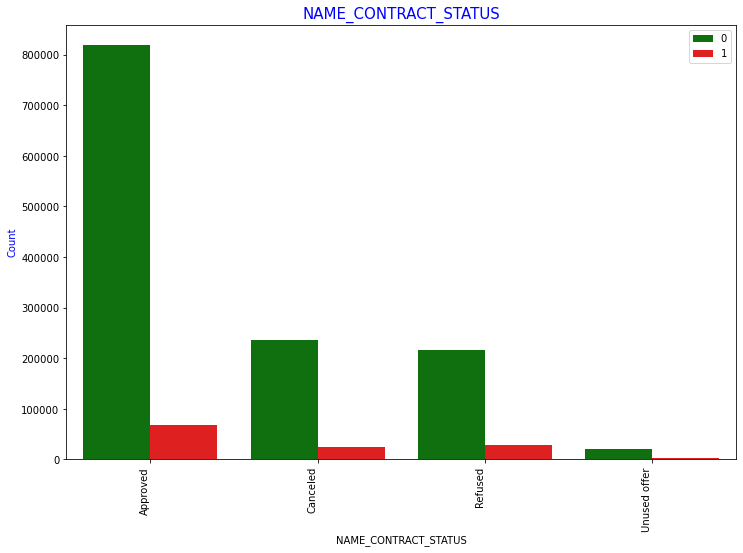

                             Counts Percentage
NAME_CONTRACT_STATUS TARGET                   
Approved             0       818856     92.41%
                     1        67243      7.59%
Canceled             0       235641     90.83%
                     1        23800      9.17%
Refused              0       215952      88.0%
                     1        29438      12.0%
Unused offer         0        20892     91.75%
                     1         1879      8.25%


In [231]:
# Checking the Contract Status based on loan repayment status and whether there is any business loss or financial loss
univariate_merged("NAME_CONTRACT_STATUS",merged_sid,"TARGET",['g','r'],False,(12,8))
g = merged_sid.groupby("NAME_CONTRACT_STATUS")["TARGET"]
df1 = pd.concat([g.value_counts(),round(g.value_counts(normalize=True).mul(100),2)],axis=1, keys=('Counts','Percentage'))
df1['Percentage'] = df1['Percentage'].astype(str) +"%" # adding percentage symbol in the results for understanding
print (df1)

## Inferences:
#### 90% of the previously cancelled client have actually repayed the loan. Revisiting the interest rates would increase business opoortunity for these clients
#### 88% of the clients who have been previously refused a loan has payed back the loan in current case.
#### Refual reason should be recorded for further analysis as these clients would turn into potential repaying customer. 

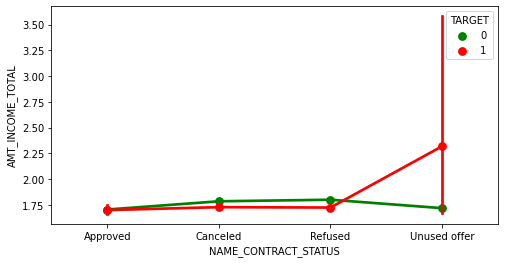

In [234]:
# plotting the relationship between income total and contact status
merged_pointplot("NAME_CONTRACT_STATUS",'AMT_INCOME_TOTAL')

## Inferences:
#### The point plot show that the people who have not used offer earlier have defaulted even when there average income is higher than others 

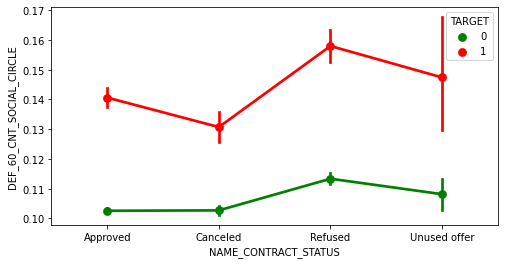

In [235]:
# plotting the relationship between people who defaulted in last 60 days being in client's social circle and contact status
merged_pointplot("NAME_CONTRACT_STATUS",'DEF_60_CNT_SOCIAL_CIRCLE')

# Inferences:

### Clients who have average of 0.13 or higher DEF_60_CNT_SOCIAL_CIRCLE score tend to default more and hence client's social circle has to be analysed before providing the loan.

# Conclusions

#### After analysing the datasets, there are few attributes of a client with which the bank would be able to identify if they will repay the loan or not. The analysis is consised as below with the contributing factors and categorization:

## Decisive Factors for an applicant to be Re-payer, hence applications can be approved

####  AMT_INCOME_TOTAL:Applicants with Income more than 700,000 are less likely to default
#### CNT_CHILDREN: Applicants with zero to two children tend to repay the loans.
#### DAYS_BIRTH: Applicants above age of 50 have low probability of defaulting.
#### DAYS_EMPLOYED: Applicants with 40+ year experience having less than 1% default rate
#### NAME_CASH_LOAN_PURPOSE: Loans bought for Hobby, Buying garage are being repayed mostly.
#### NAME_EDUCATION_TYPE: Academic degree has less defaults.
#### NAME_INCOME_TYPE: Student and Businessmen have no defaults.
#### ORGANIZATION_TYPE: Applicants with Trade Type 4 and 5 and Industry type 8 have defaulted less than 3%.
#### REGION_RATING_CLIENT: Applicants who live in areas with Region Rating 1 are safe borrowers.

## Decisive Factors for an applicant to be a potential Defaulter, hence application can be rejected :

#### AMT_GOODS_PRICE: When the credit amount goes beyond 3M, there is an increase in defaulters.
#### CODE_GENDER: Male applicants have relatively higher default rate
#### CNT_CHILDREN : Applicants who have children equal to or more than 9 default 100% and hence their applications can to be rejected.
#### CNT_FAM_MEMBERS: Applicants who have higher family members (>=11) have higher default rate and their applications can be rejected.
#### DAYS_BIRTH: Avoid young applicants who are in age group of 20-40 as they have higher probability of defaulting
#### DAYS_EMPLOYED: Applicants who have less than 5 years of employment have high default rate.
#### NAME_EDUCATION_TYPE: Applicants with Lower Secondary, Secondary education and incomplete higher education have higher default rate
#### NAME_FAMILY_STATUS : Applicants in civil marriage or who are single have higher default rate
#### NAME_INCOME_TYPE: Applicants who are either at Maternity leave or Unemployed have higher default rate.
#### OCCUPATION_TYPE: Applicants who are Low-skill Laborers, Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff as the default rate is huge.
#### ORGANIZATION_TYPE: Organizations with highest percent of loans not repaid are Transport: type 3 (16%), Industry: type 13 (13.5%), Industry: type 8 (12.5%) and Restaurant (less than 12%). Self-employed people have relative high defaulting rate, and thus should be avoided to be approved for loan or provide loan with higher interest rate to mitigate the risk of defaulting.
##### REGION_RATING_CLIENT: Applicants who live in areas with Region Rating as 3 has highest defaults.

## Decisive attributes for an potential defaulters who can be considered for loan with higher interest to mitigate any default risk to prevent business loss:

#### AMT_CREDIT: Applicants who get loan for 300-600k tend to default more than others and hence having higher interest specifically for this credit range would be ideal.
#### AMT_INCOME: Since 90% of the applications have Income total less than 300,000 and they have high probability of defaulting, they could be offered loan with higher interest compared to other income category.
#### CNT_CHILDREN : Applicants who have 4 to 8 children have a very high default rate and hence higher interest should be imposed on their loans.
#### CNT_FAM_MEMBERS :Applicants with family members between 8 to 10 have a very high default rate and hence higher interest should be imposed on their loans.
#### NAME_CASH_LOAN_PURPOSE: Loan taken for the purpose of Repairs seems to have highest default rate. A very high number applications have been rejected by bank or refused by client in previous applications as well which has purpose as repair or other. This shows that purpose repair is taken as high risk by bank and either they are rejected, or bank offers very high loan interest rate which is not feasible by the clients, thus they refuse the loan. The same approach could be followed in future as well.
#### NAME_HOUSING_TYPE: High number of loan applications are from the category of people who live in Rented apartments & living with parents and hence offering the loan would mitigate the loss if any of those default.

## More suggestions:

#### 90% of the previously cancelled client have actually repayed the loan. Recording the reason for cancellation which might help the bank to determine and negotiate terms with these repaying customers in future for increase business opportunity.
#### 88% of the clients who were refused by bank for loan earlier have now turned into a repaying client. Hence documenting the reason for rejection could mitigate the business loss and these clients could be contacted for further loans.